# EDA Process

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()

#creating a dataframe from this data
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df['target'] = breast_cancer_data.target

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
# Breif information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# Checking null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
# checking duplicates
df.duplicated().sum()

0

In [7]:
# Generate descriptive statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
# Checking skewness in Descending Order
df.skew().sort_values(ascending=False)

area error                 5.447186
concavity error            5.110463
fractal dimension error    3.923969
perimeter error            3.443615
radius error               3.088612
smoothness error           2.314450
symmetry error             2.195133
compactness error          1.902221
worst area                 1.859373
worst fractal dimension    1.662579
texture error              1.646444
mean area                  1.645732
worst compactness          1.473555
concave points error       1.444678
worst symmetry             1.433928
mean concavity             1.401180
mean fractal dimension     1.304489
mean compactness           1.190123
mean concave points        1.171180
worst concavity            1.150237
worst perimeter            1.128164
worst radius               1.103115
mean perimeter             0.990650
mean radius                0.942380
mean symmetry              0.725609
mean texture               0.650450
worst texture              0.498321
worst concave points       0

In [9]:
def plot_visualizer(df,column):# created a vishualisation function to plot histogram and Boxplot
    i = str(column)
    # Boxplot
    plt.figure(figsize=(20,13))
    plt.subplot(2, 2, 1)
    sns.boxplot(data=df[i],orient="h")
    plt.title('Boxplot of '+i)
    
    #Histogram
    plt.subplot(2, 2, 2)
    sns.histplot(df[i], kde= True)
    plt.title('Histogram of '+i)
    plt.show()

In [10]:
df_iqr = df

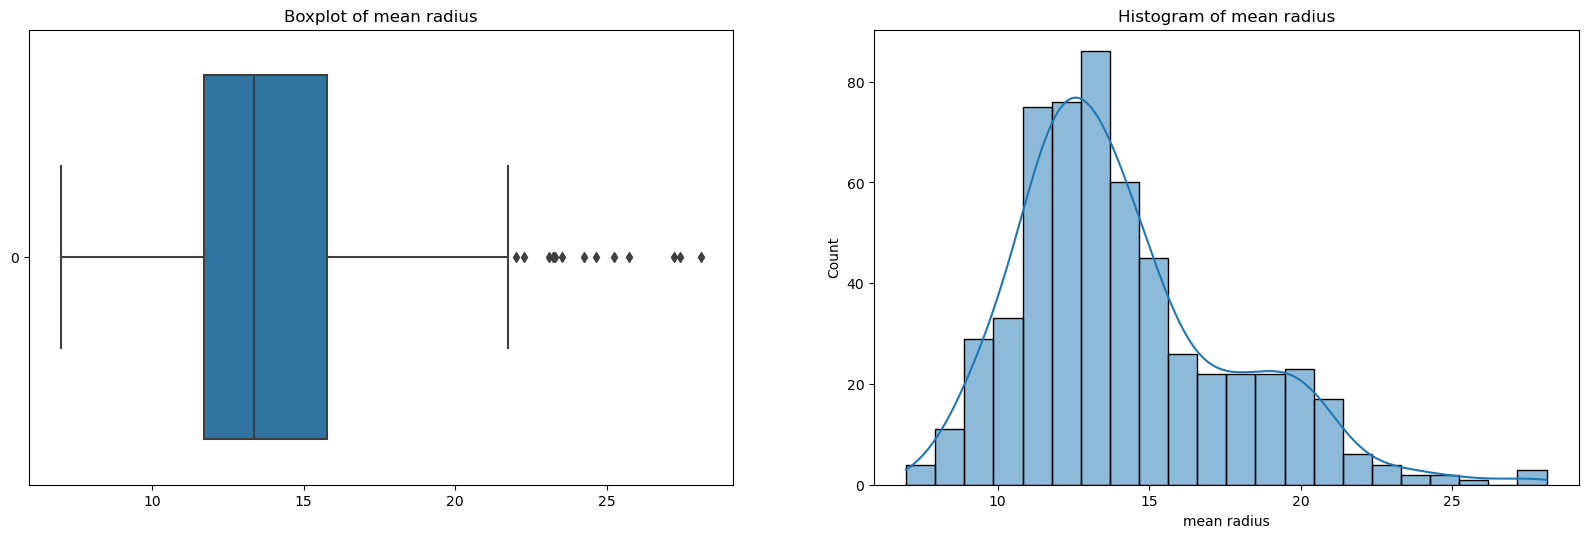

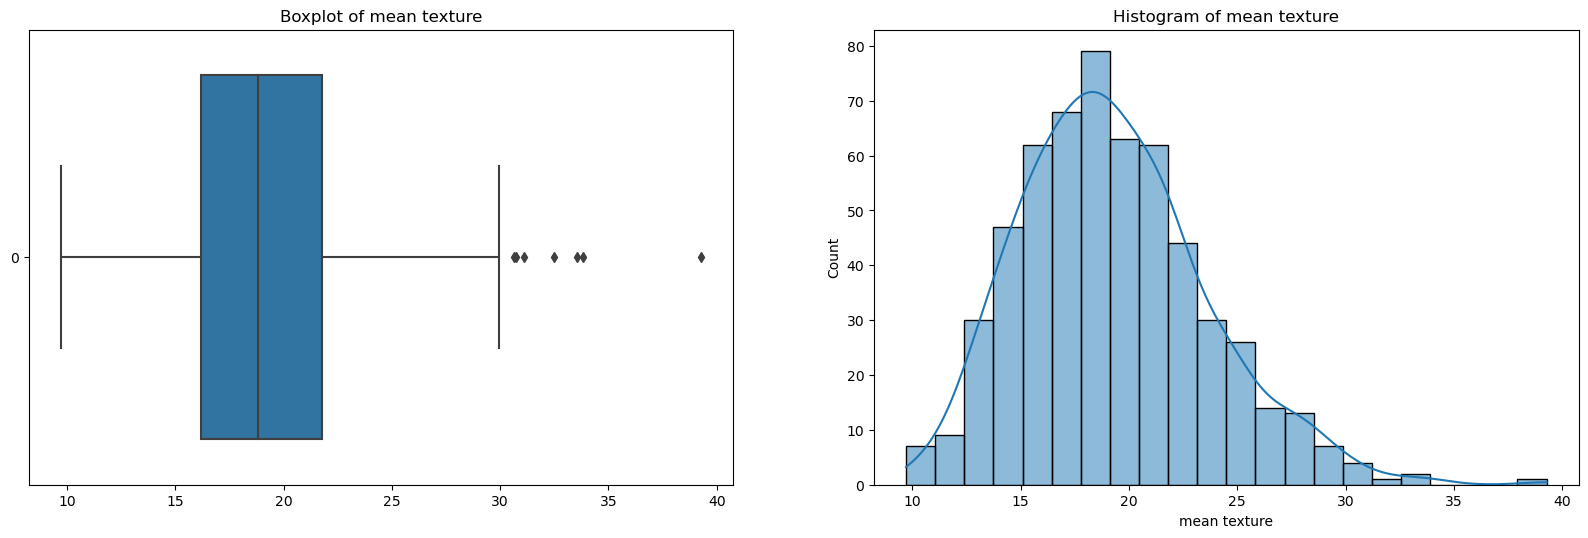

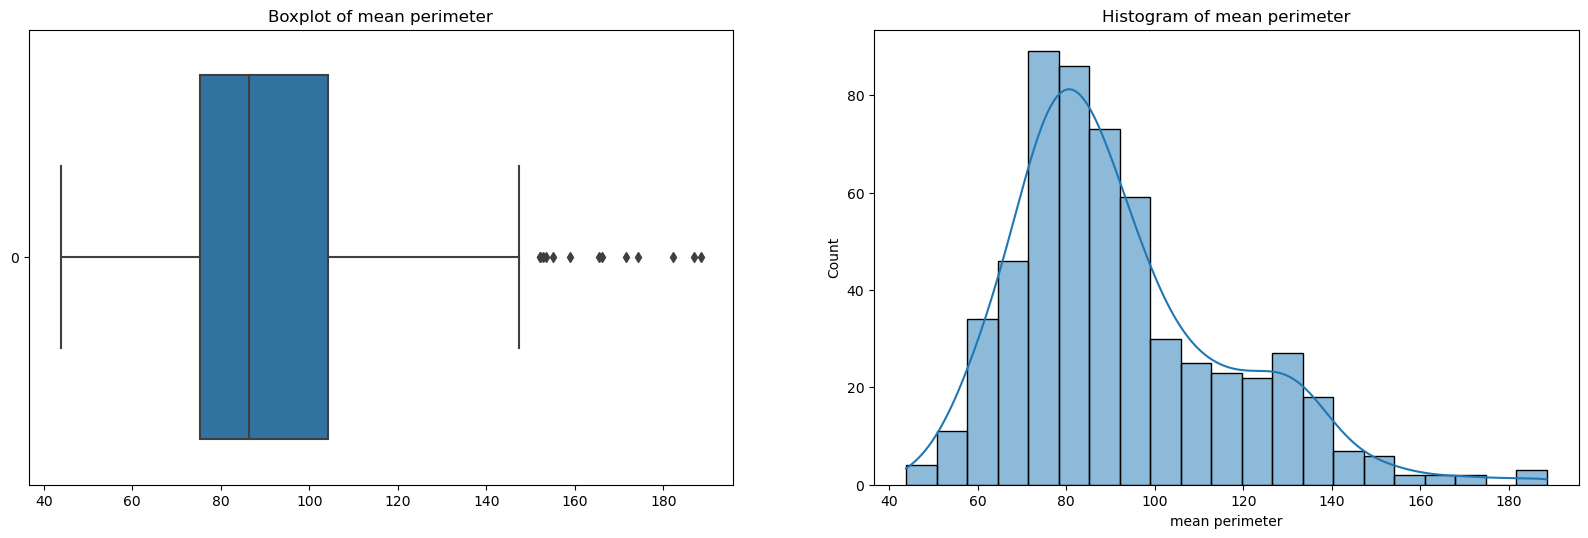

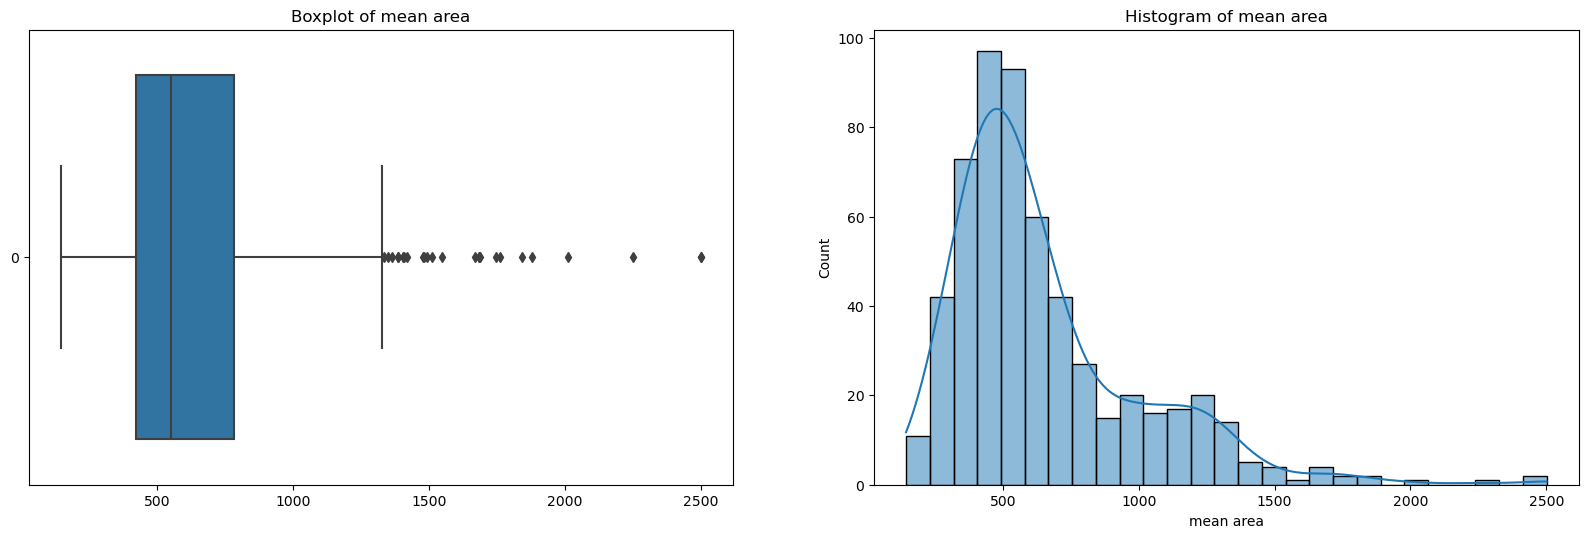

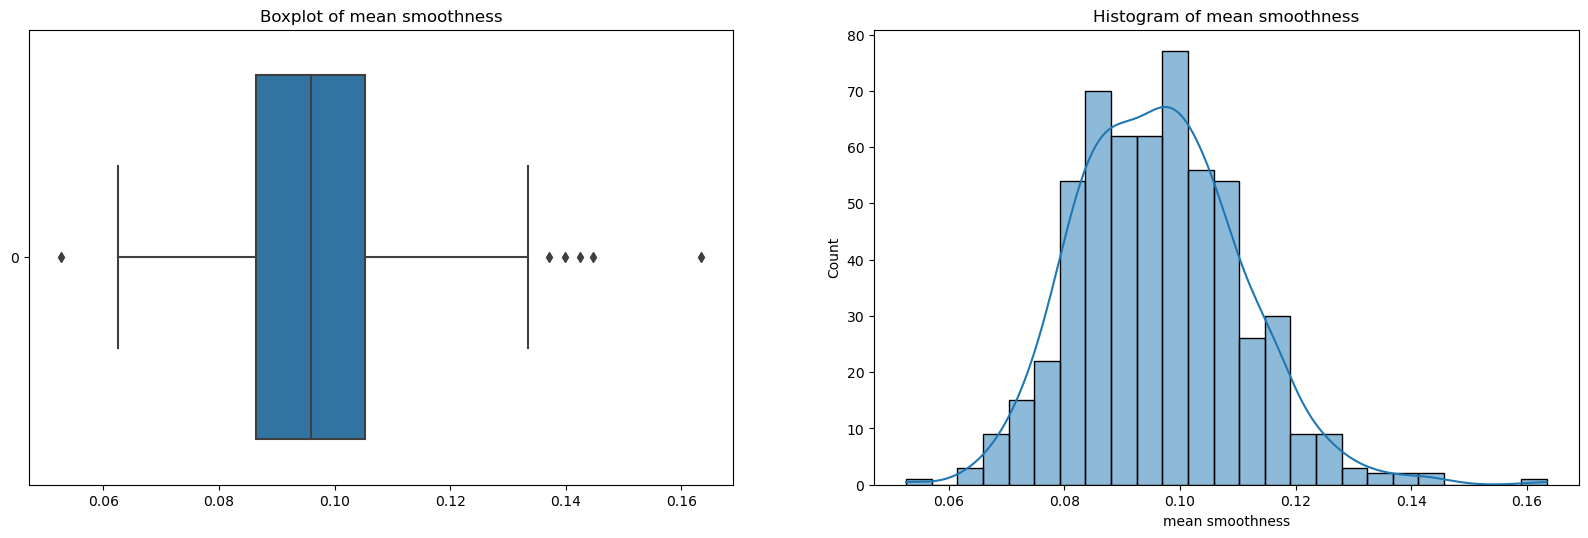

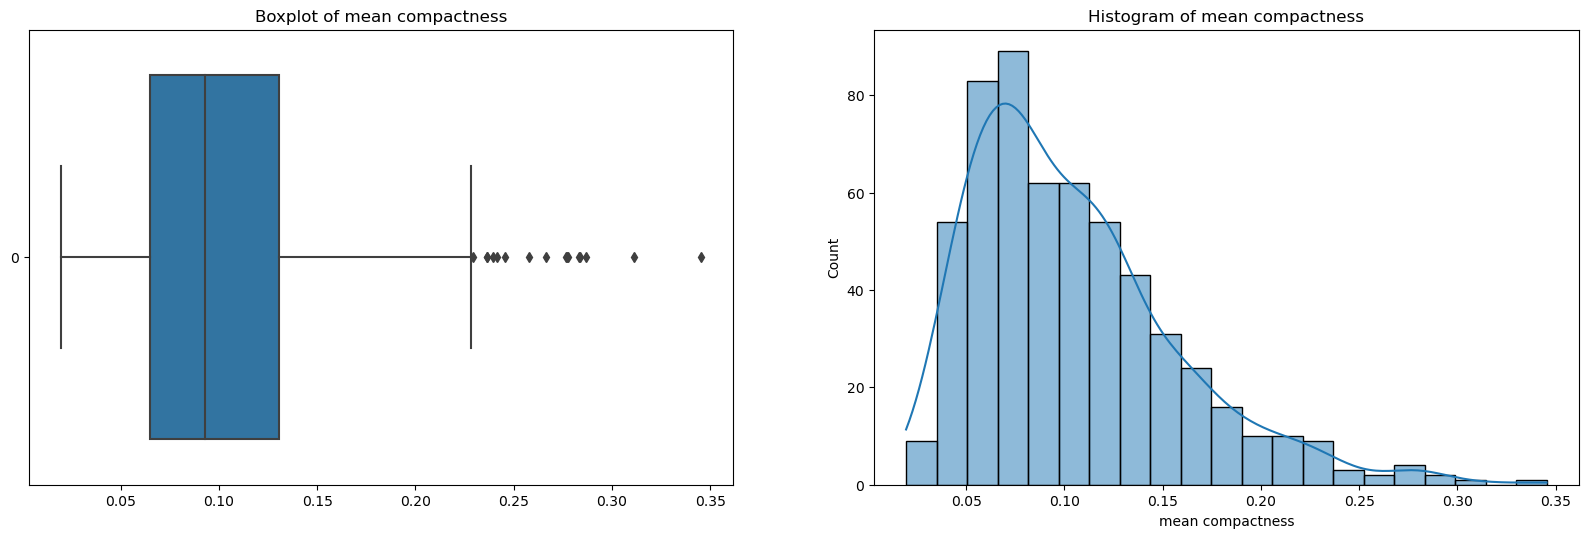

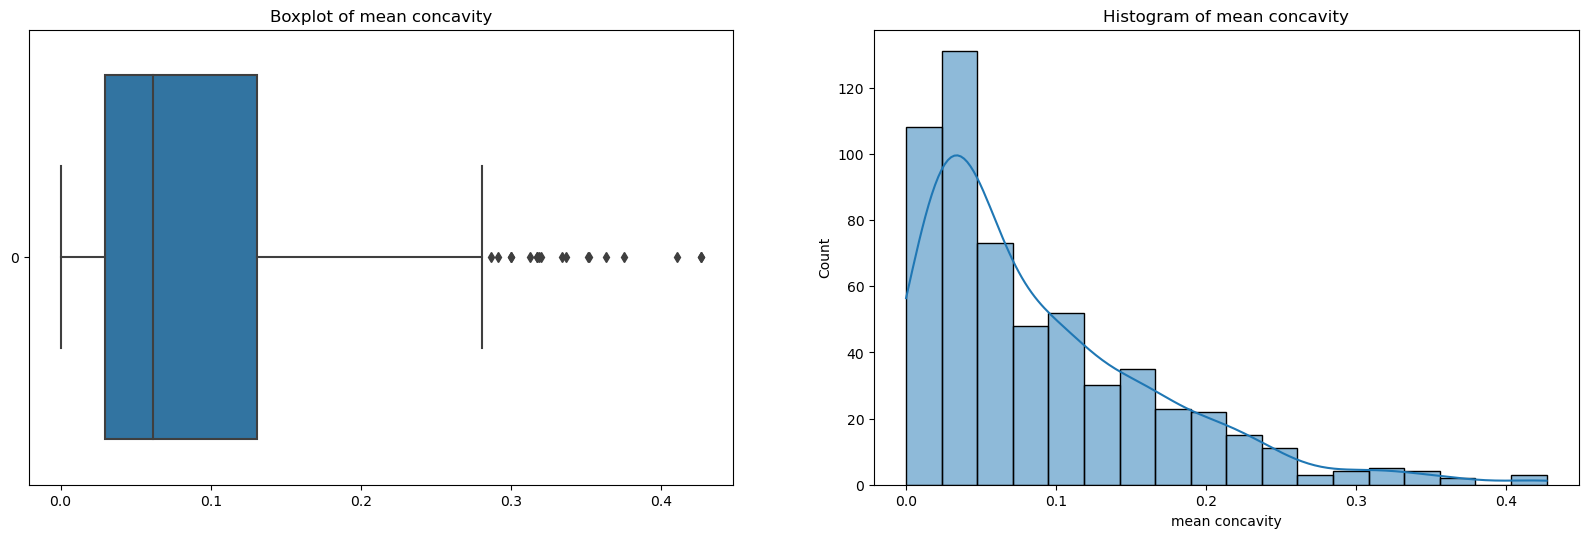

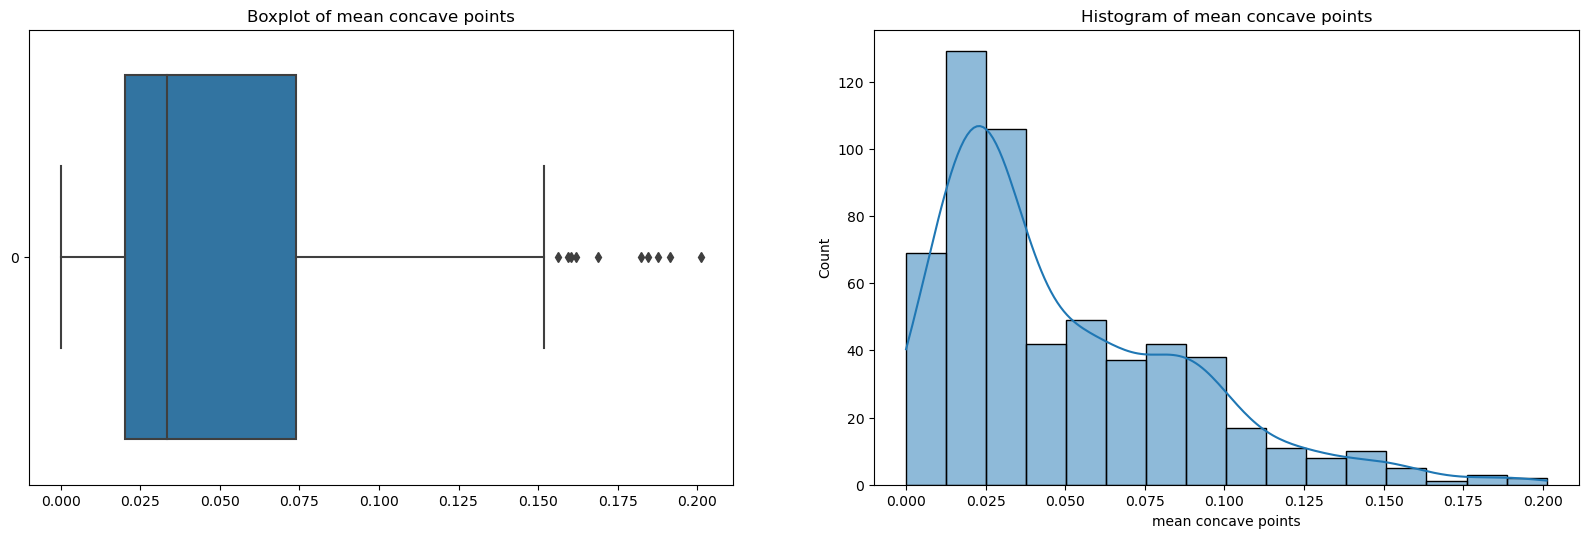

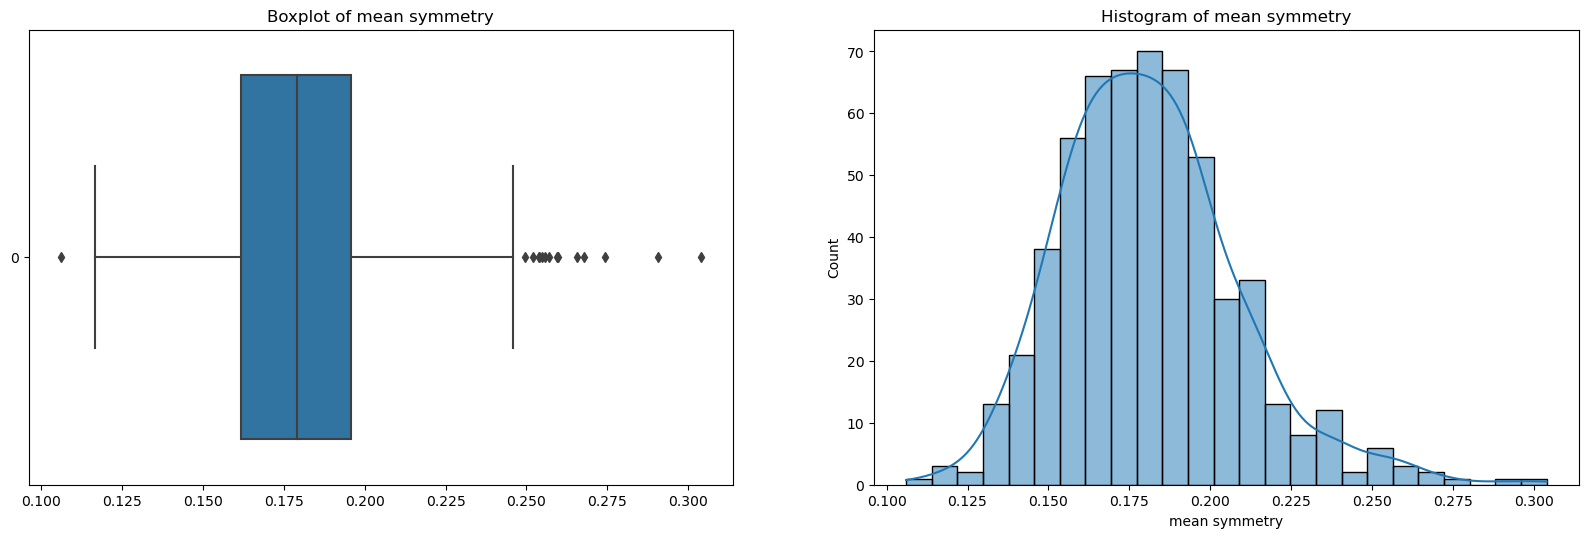

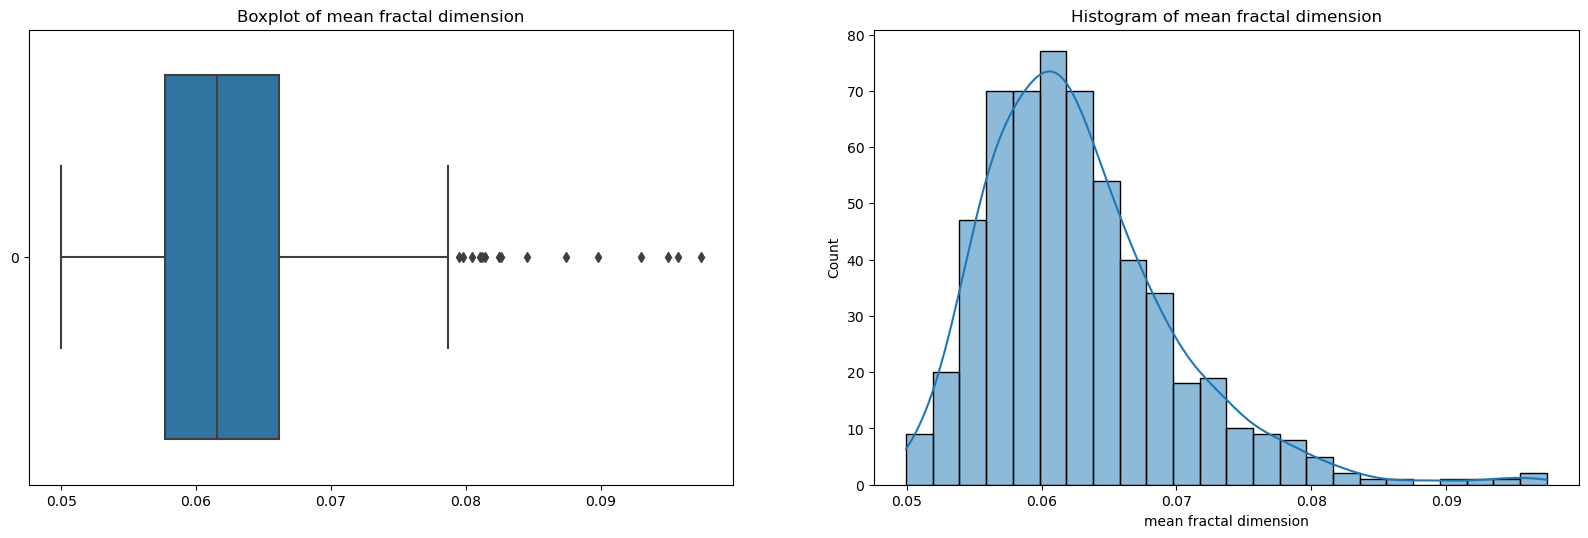

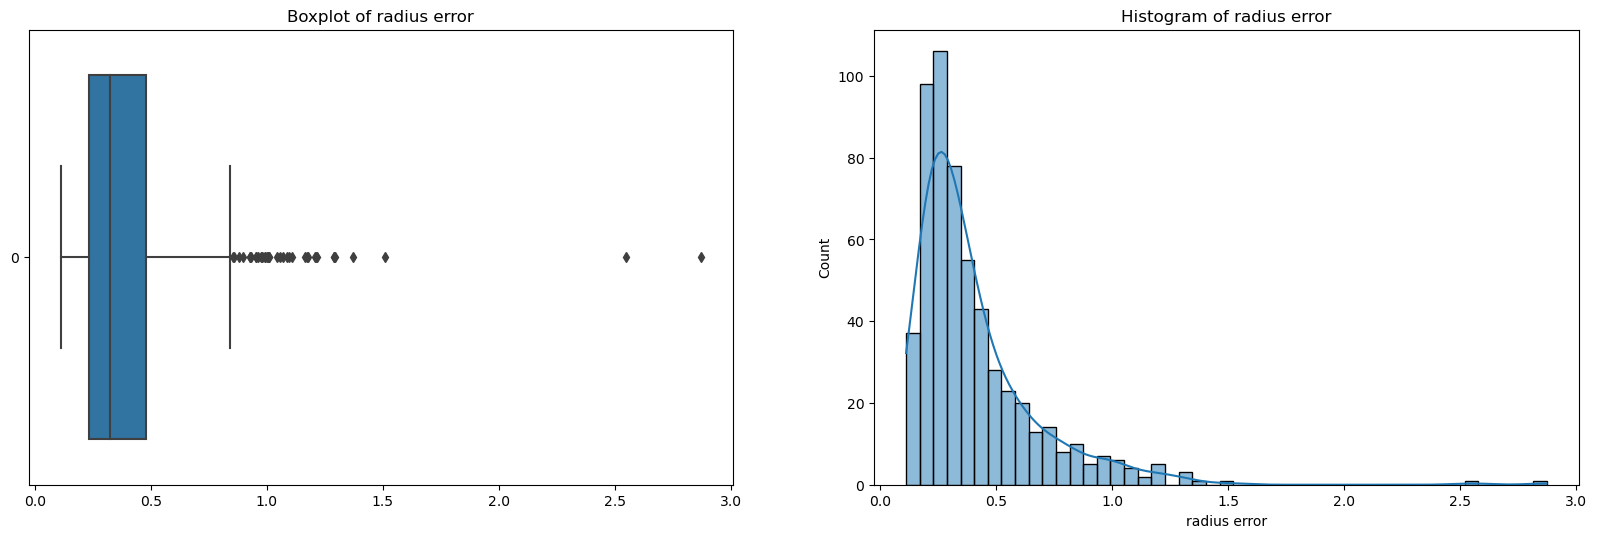

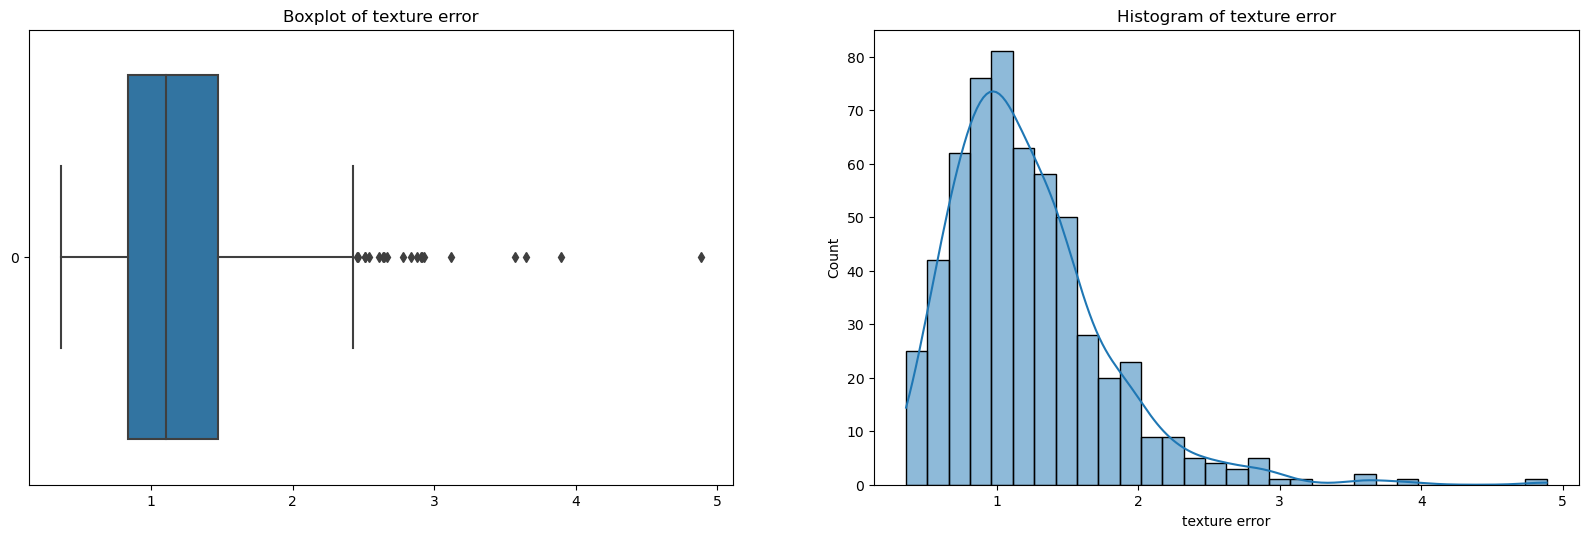

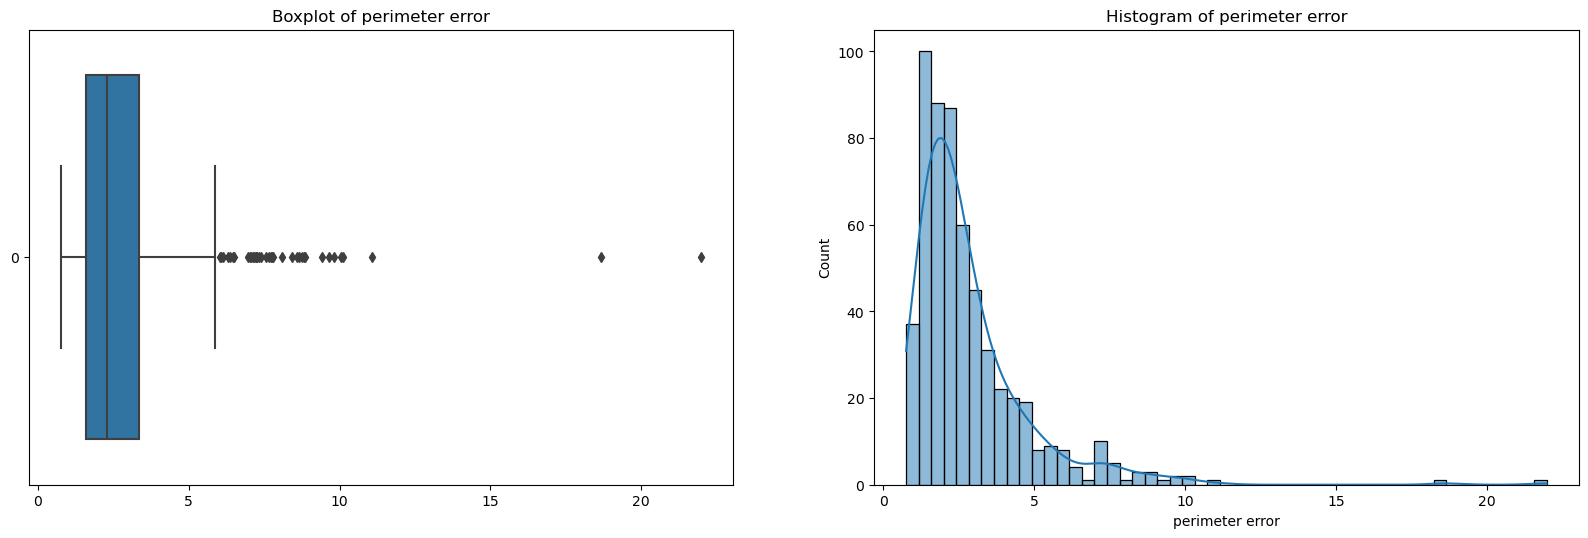

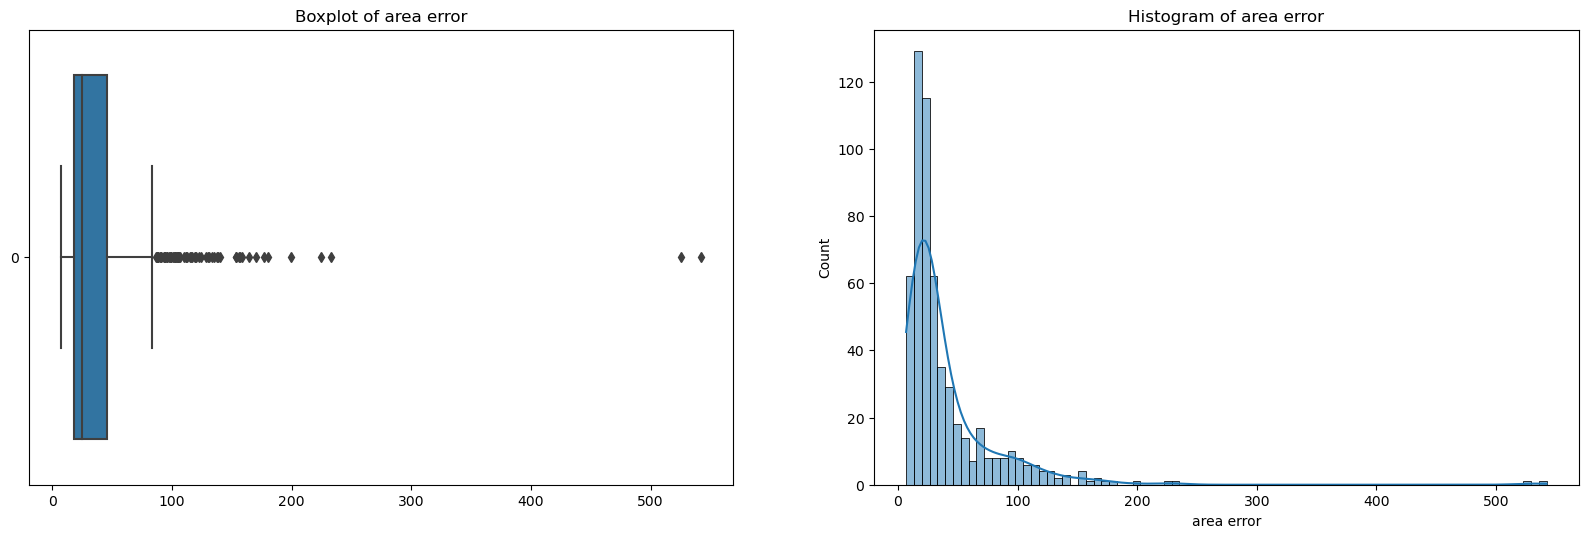

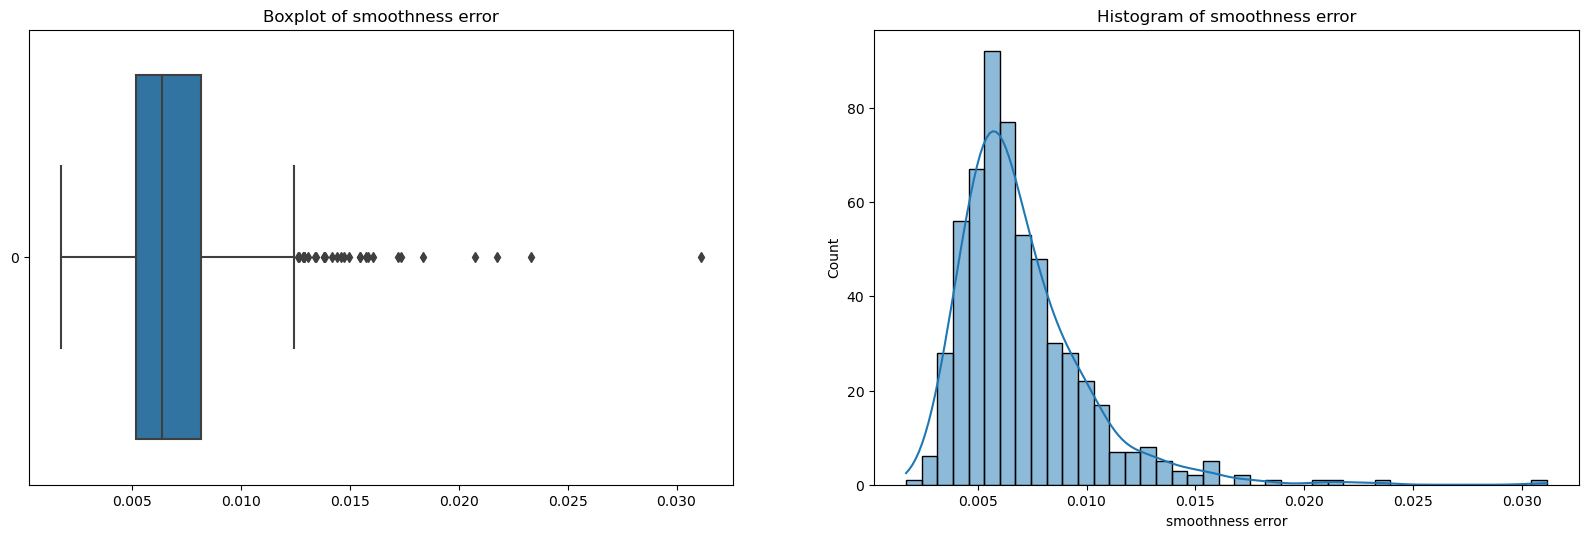

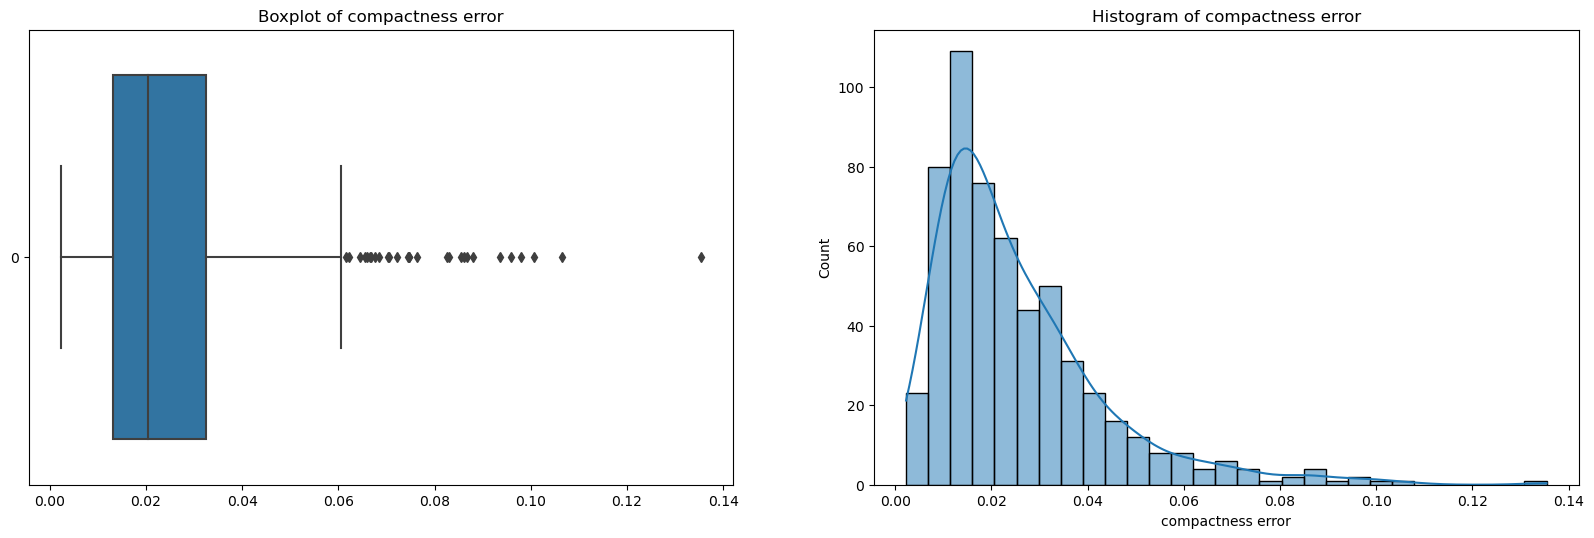

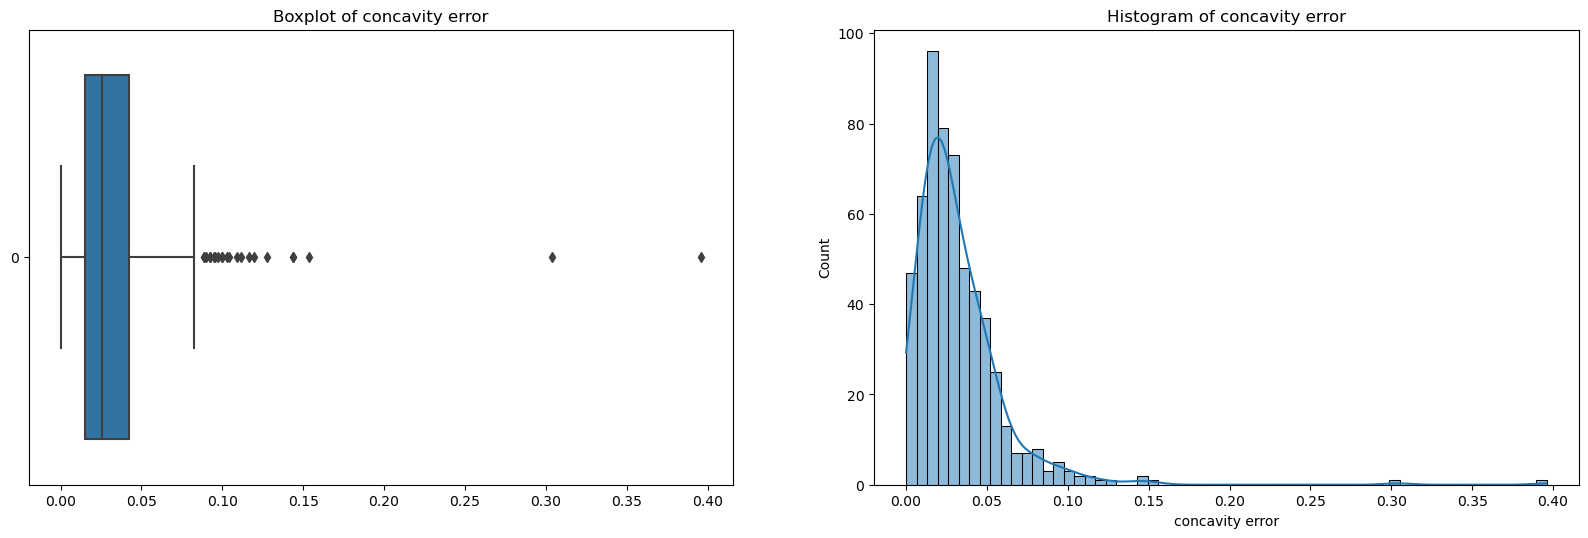

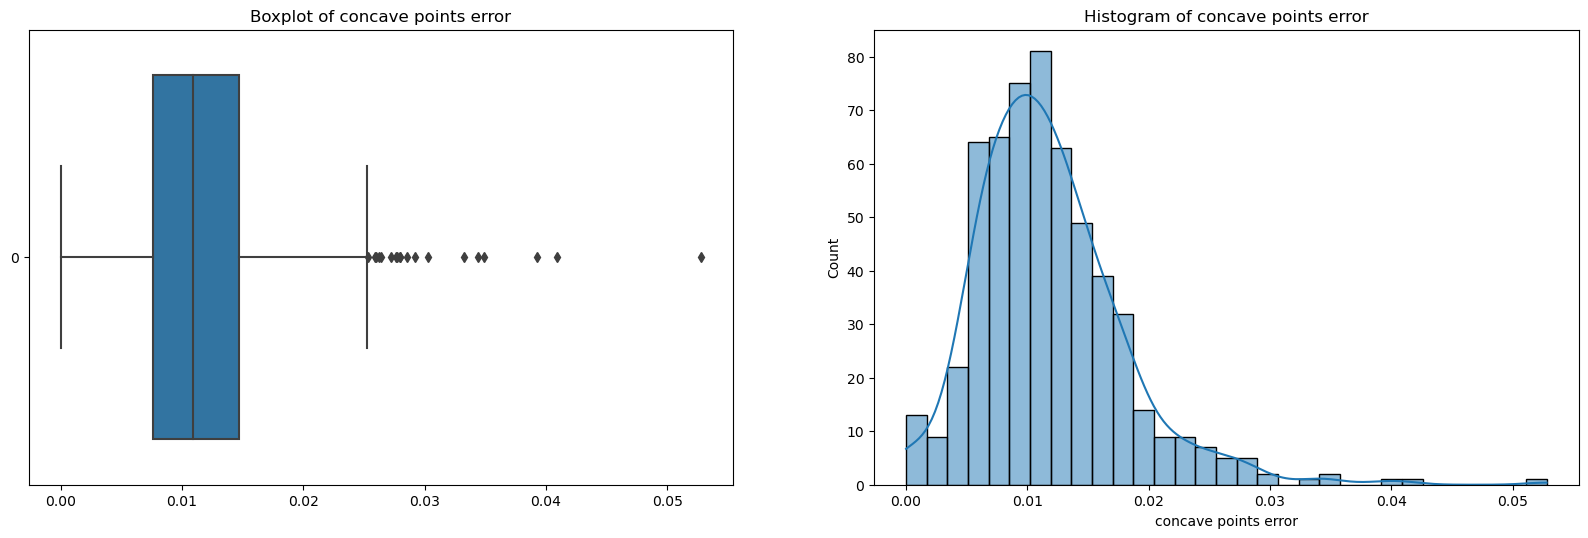

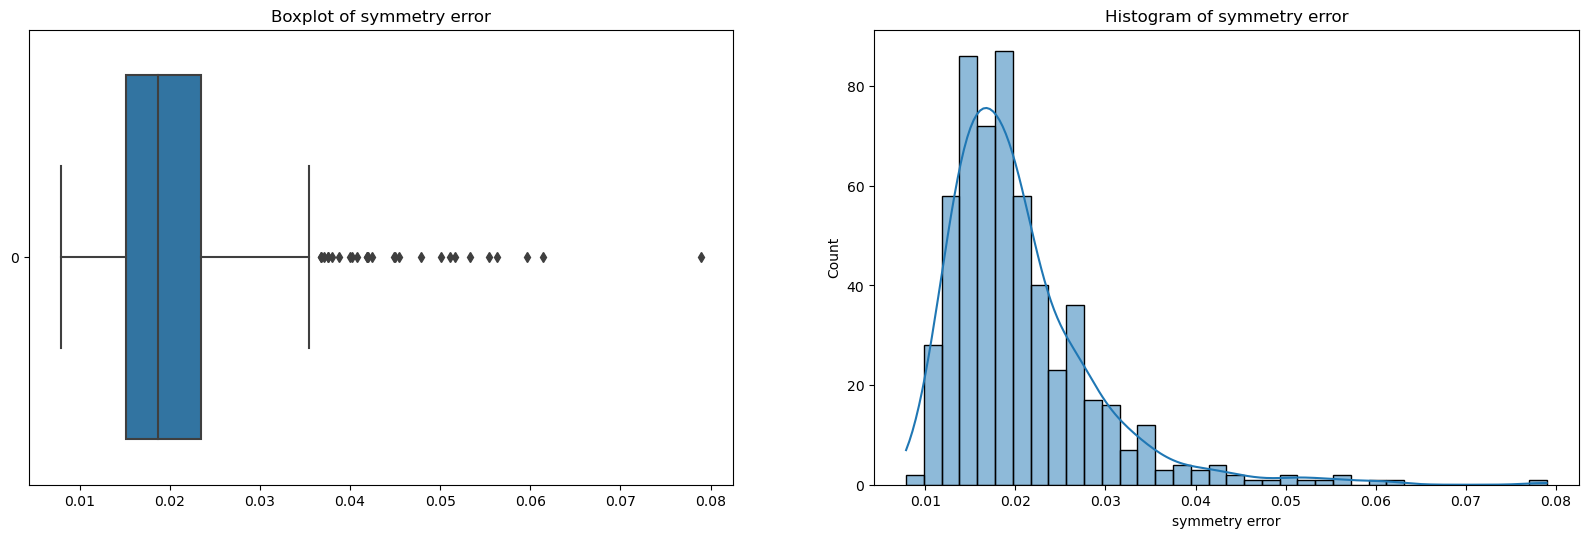

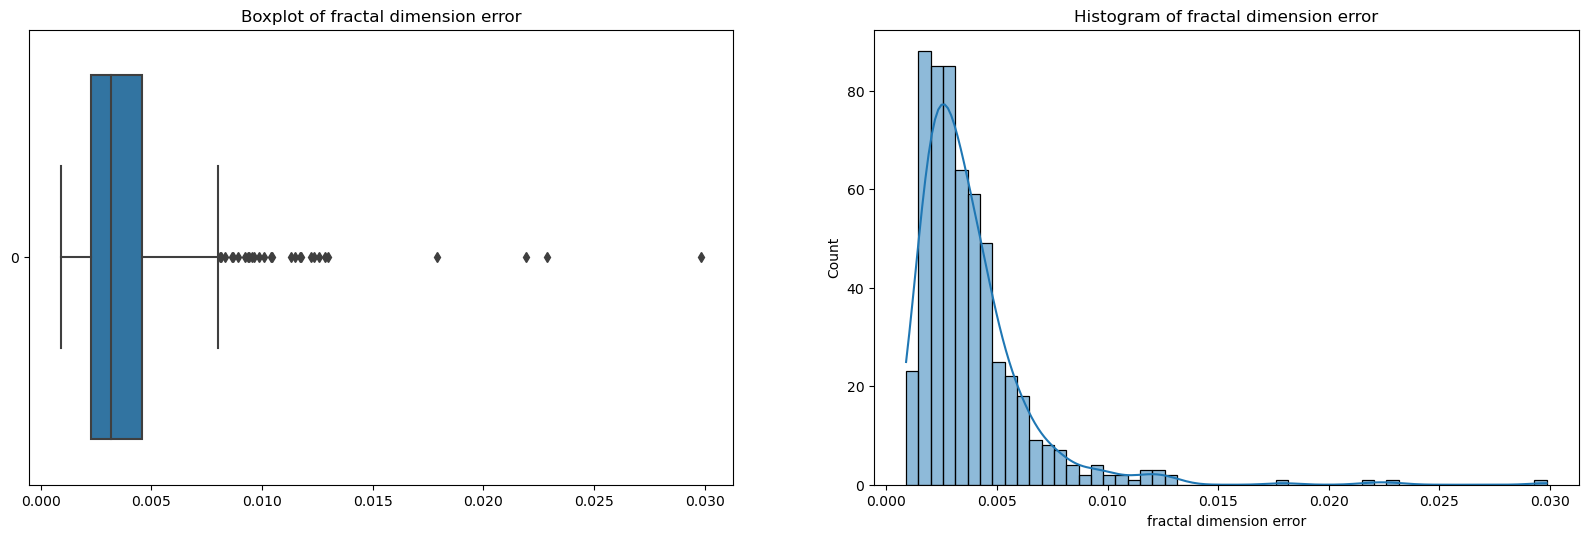

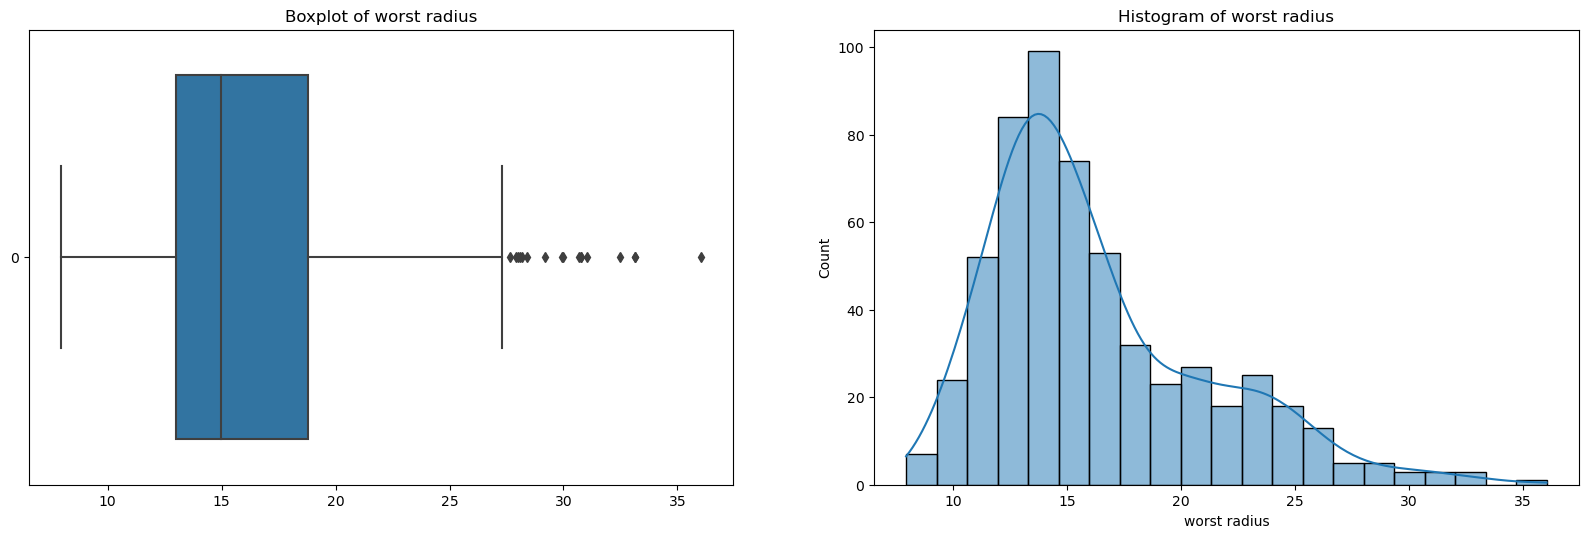

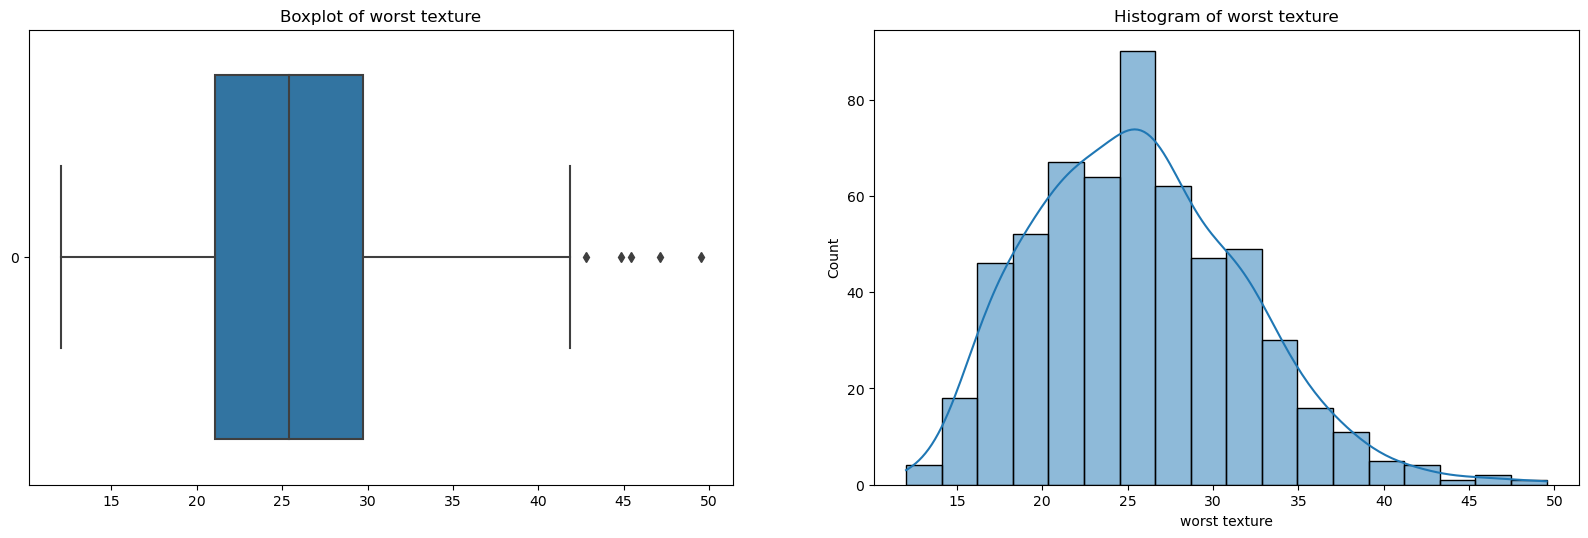

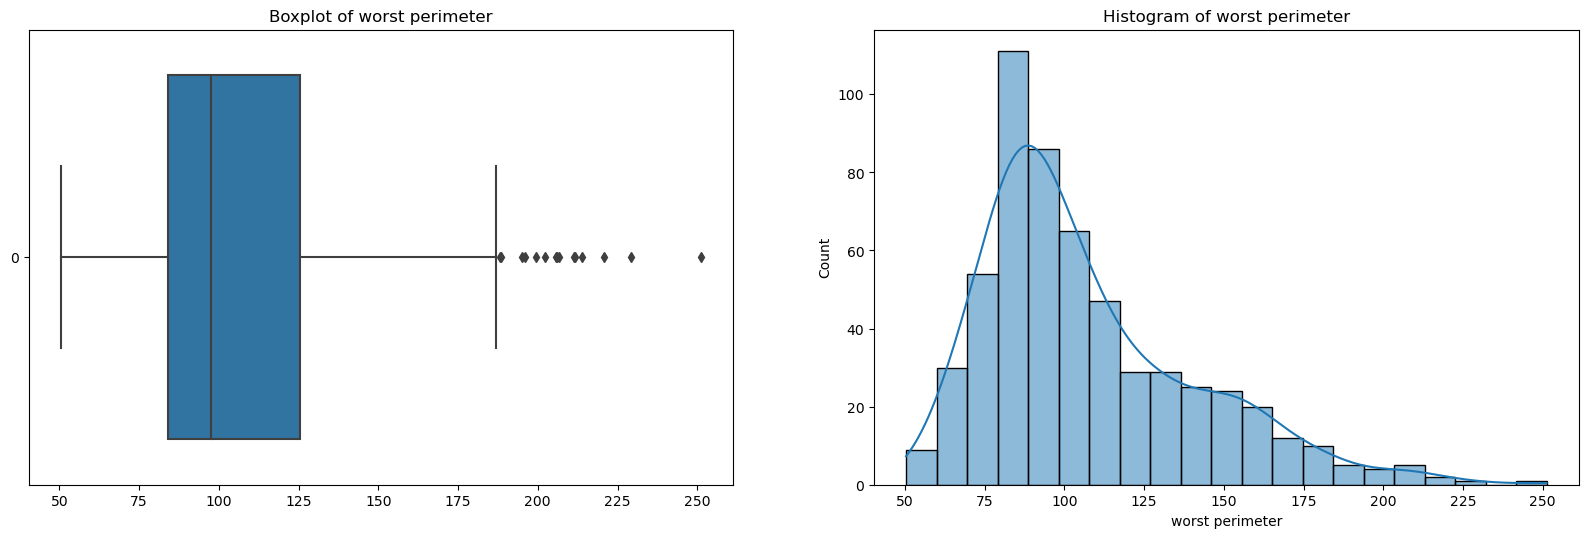

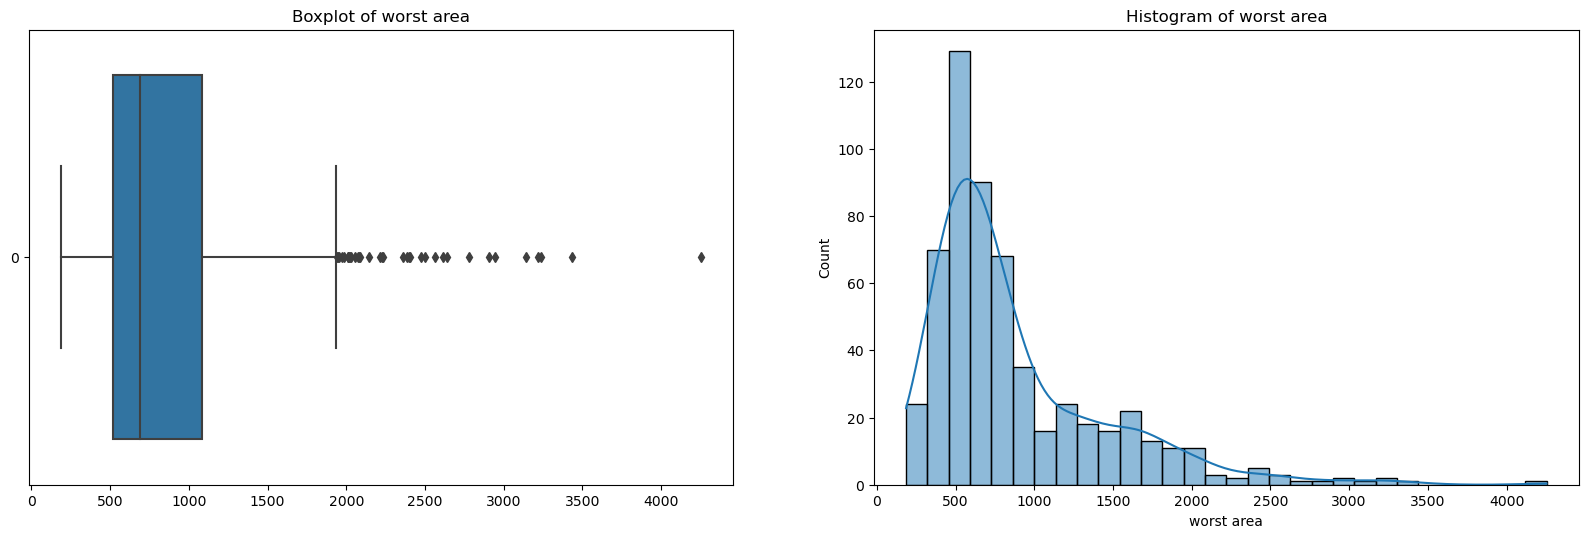

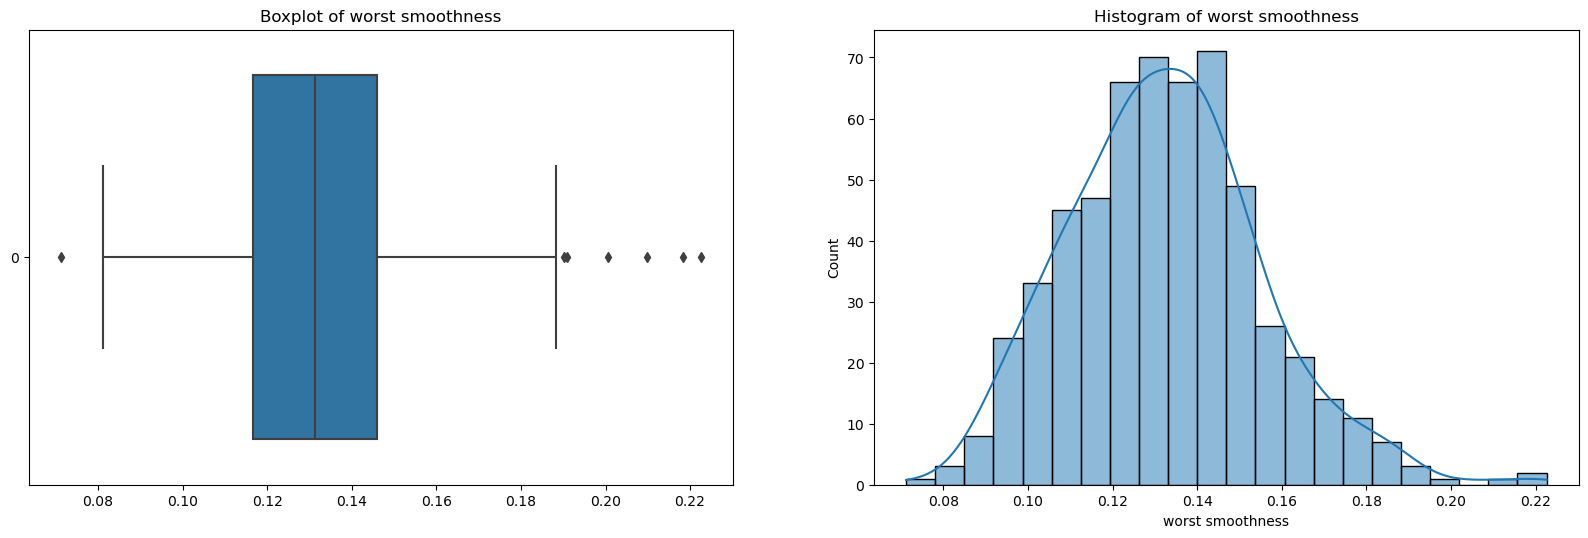

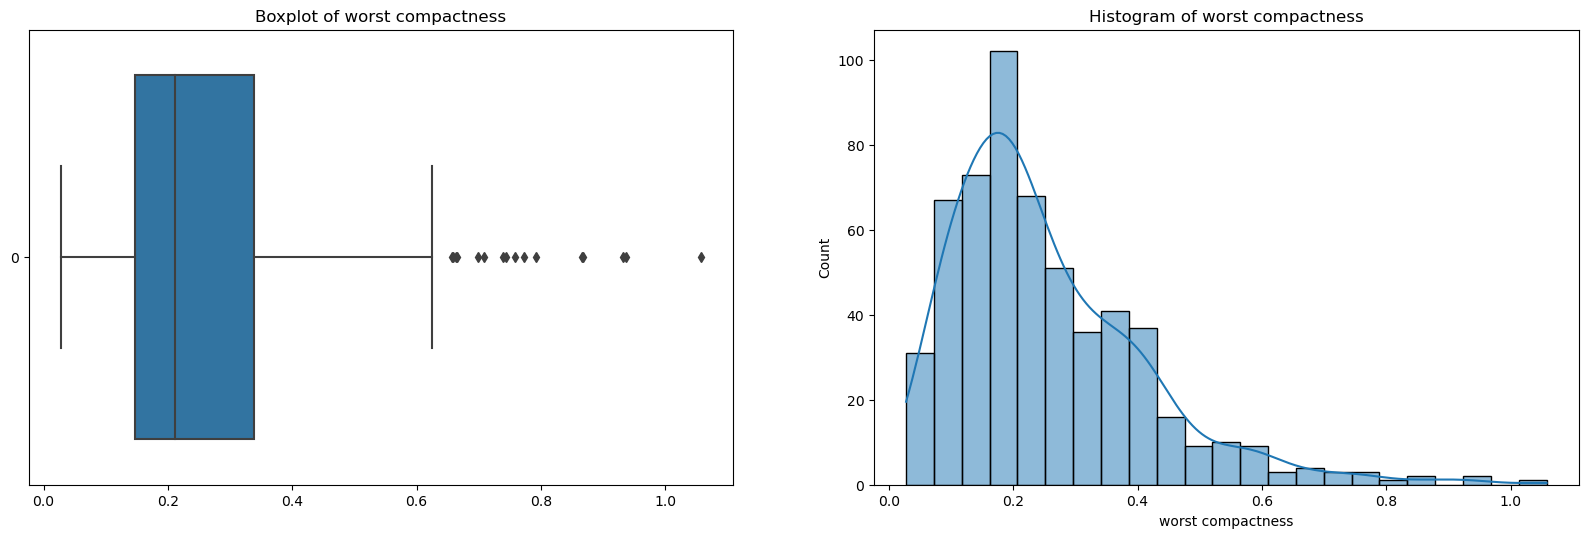

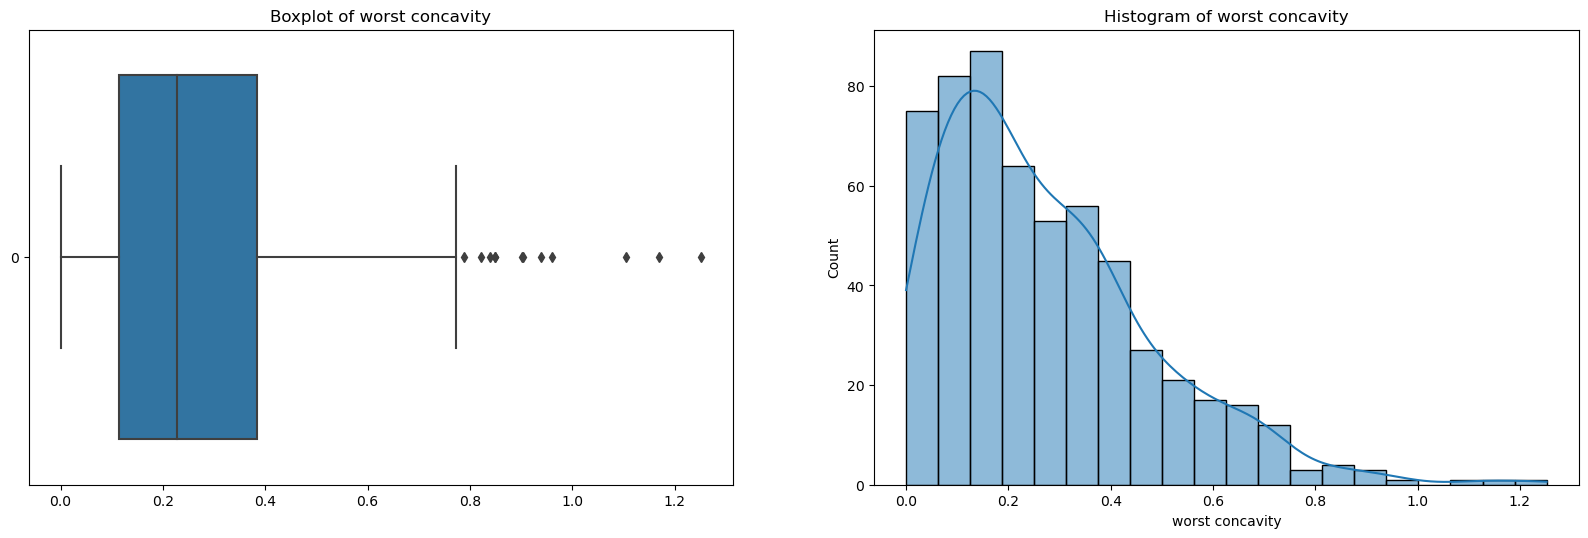

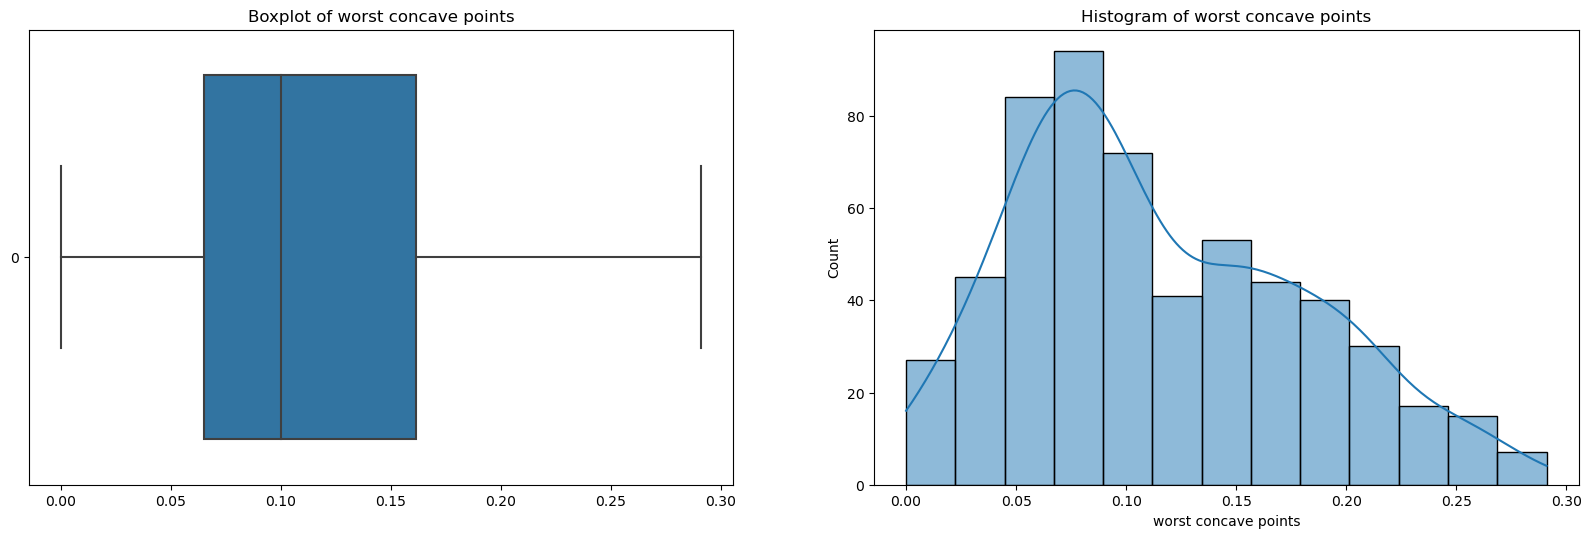

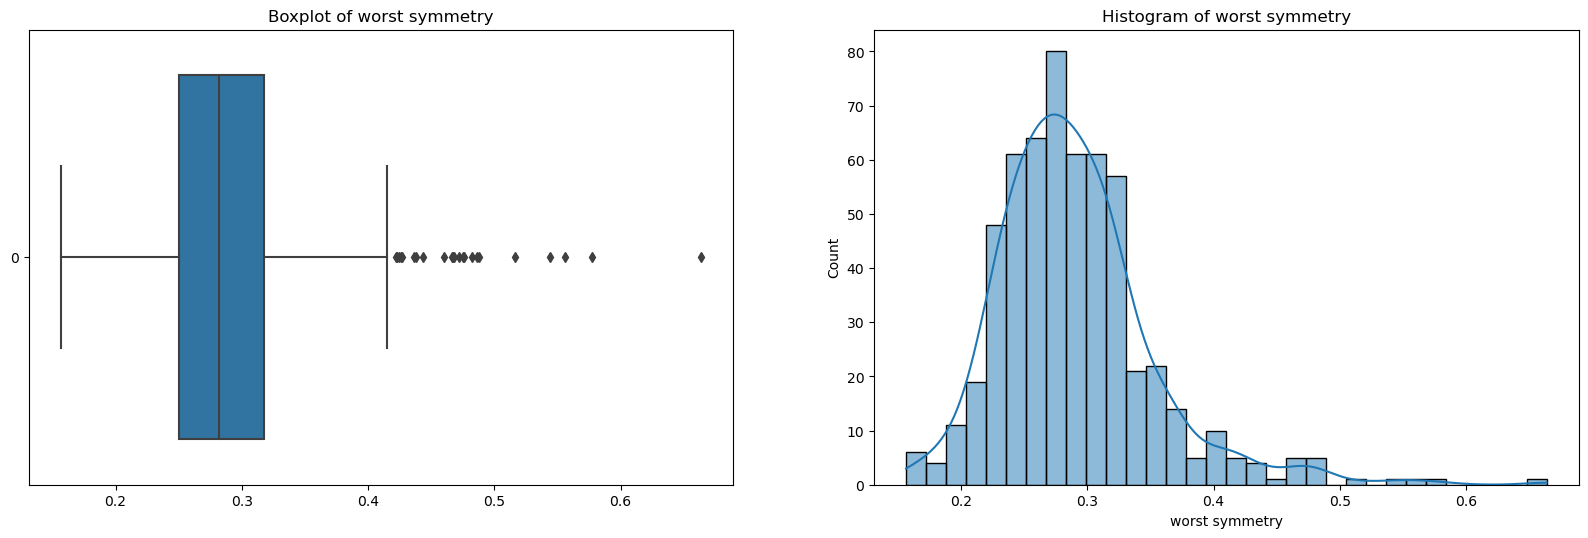

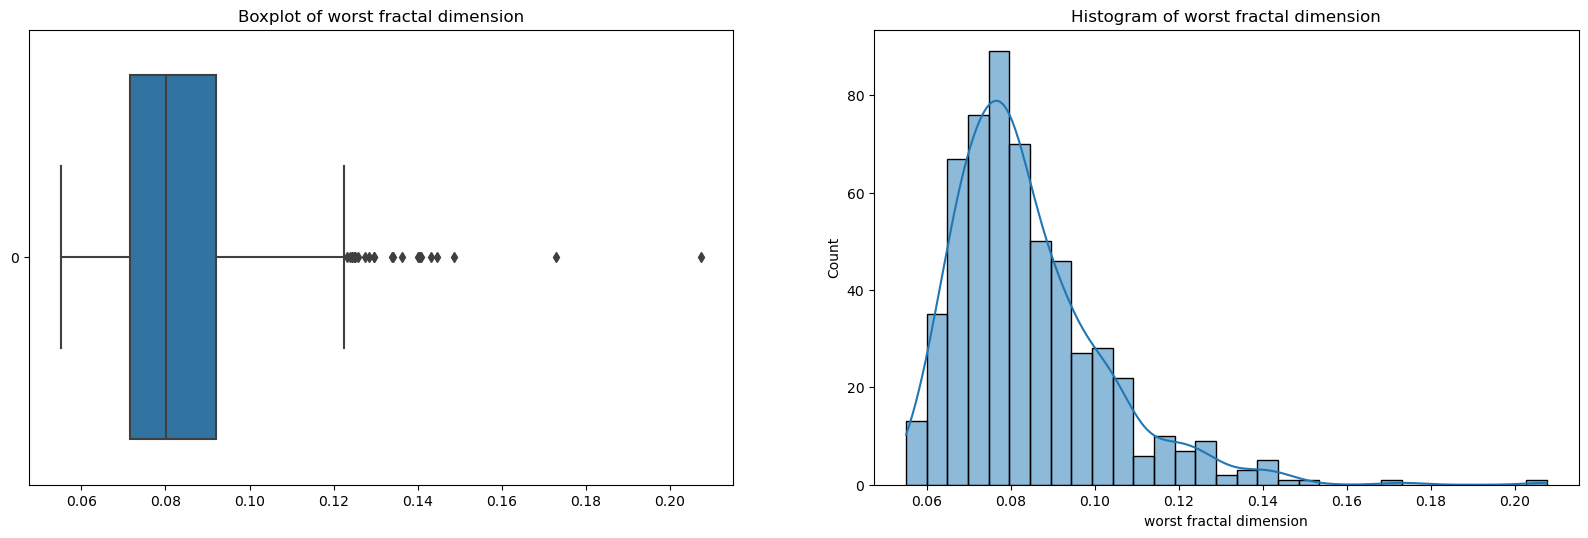

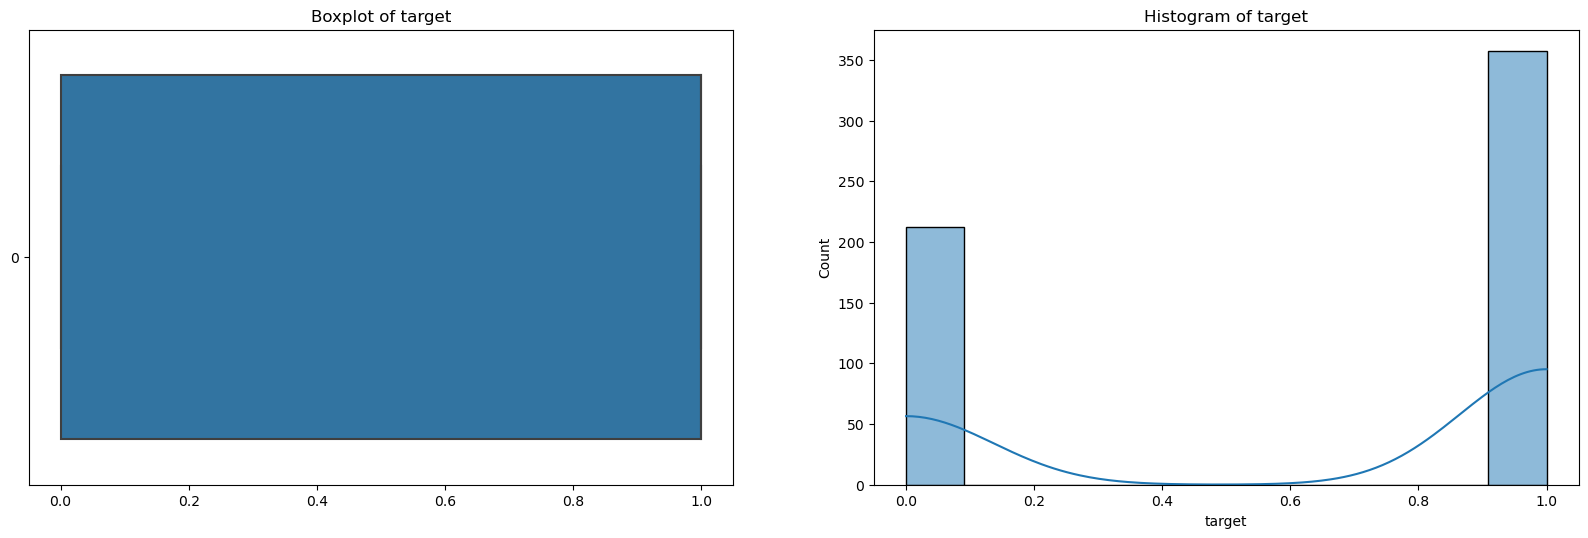

In [11]:
for i in df_iqr:  
    plot_visualizer(df_iqr,i)
    print()

### The IQR method is used to mitigate skewness

In [12]:
def iqr(df,column,iqr_range):  # This function is used to perform IQR Method and replace outliers with Upper and Lower whiskers
    df_iqr = df
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)

    # finding IQR range
    iqr=q3-q1

    lower_whisker = q1-iqr_range*iqr
    upper_whisker = q3+iqr_range*iqr

    # Removing values lower and greater than whiskers values
    df_iqr[column] = df[column].apply(lambda x : lower_whisker if x < lower_whisker else x)
    df_iqr[column] = df[column].apply(lambda x : upper_whisker if x > upper_whisker else x)
    return df_iqr
    

In [13]:
df_iqr = iqr(df,'area error',1.5) #IQR method for performing IQR technique

In [14]:
df_iqr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


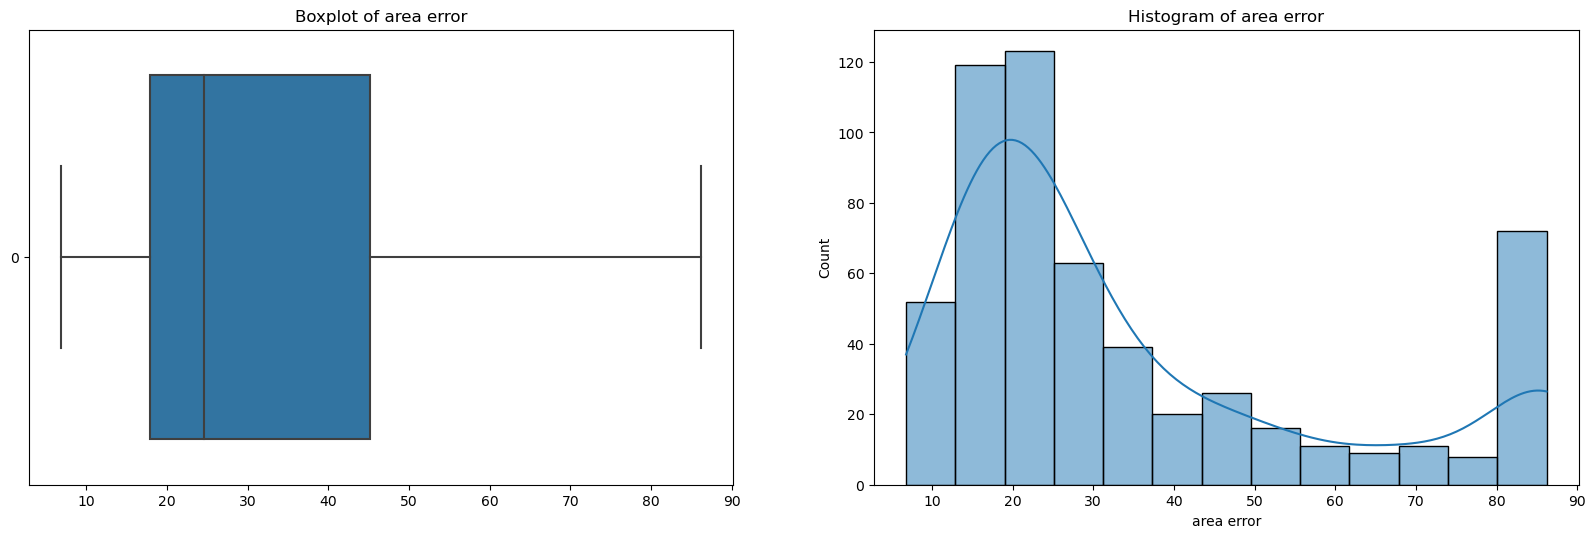

In [15]:
plot_visualizer(df_iqr, 'area error')

In [16]:
df_iqr.skew().sort_values(ascending=False)

concavity error            5.110463
fractal dimension error    3.923969
perimeter error            3.443615
radius error               3.088612
smoothness error           2.314450
symmetry error             2.195133
compactness error          1.902221
worst area                 1.859373
worst fractal dimension    1.662579
texture error              1.646444
mean area                  1.645732
worst compactness          1.473555
concave points error       1.444678
worst symmetry             1.433928
mean concavity             1.401180
mean fractal dimension     1.304489
mean compactness           1.190123
mean concave points        1.171180
worst concavity            1.150237
area error                 1.130940
worst perimeter            1.128164
worst radius               1.103115
mean perimeter             0.990650
mean radius                0.942380
mean symmetry              0.725609
mean texture               0.650450
worst texture              0.498321
worst concave points       0

In [17]:
df_iqr = iqr(df,'concavity error',1.5) #IQR method for performing IQR technique

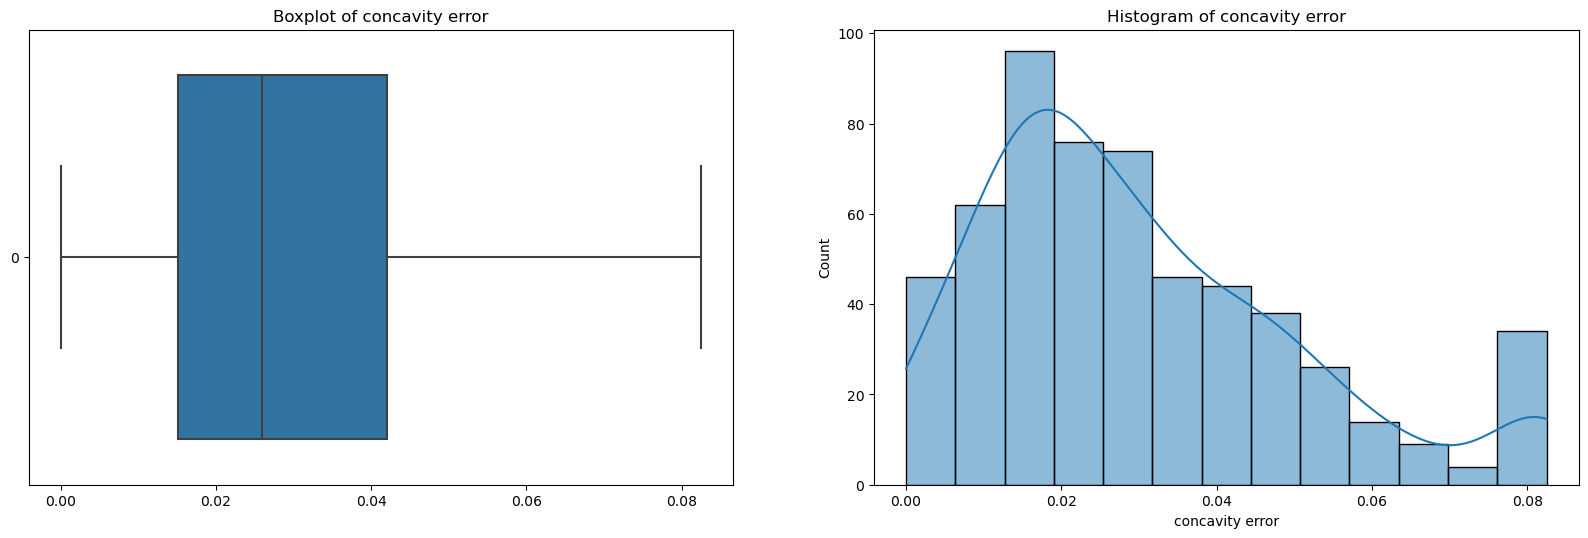

In [18]:
plot_visualizer(df_iqr, 'concavity error')

In [19]:
df_iqr.skew().sort_values(ascending=False)

fractal dimension error    3.923969
perimeter error            3.443615
radius error               3.088612
smoothness error           2.314450
symmetry error             2.195133
compactness error          1.902221
worst area                 1.859373
worst fractal dimension    1.662579
texture error              1.646444
mean area                  1.645732
worst compactness          1.473555
concave points error       1.444678
worst symmetry             1.433928
mean concavity             1.401180
mean fractal dimension     1.304489
mean compactness           1.190123
mean concave points        1.171180
worst concavity            1.150237
area error                 1.130940
worst perimeter            1.128164
worst radius               1.103115
mean perimeter             0.990650
mean radius                0.942380
concavity error            0.916740
mean symmetry              0.725609
mean texture               0.650450
worst texture              0.498321
worst concave points       0

In [20]:
df_iqr = iqr(df_iqr,"fractal dimension error",1.5)

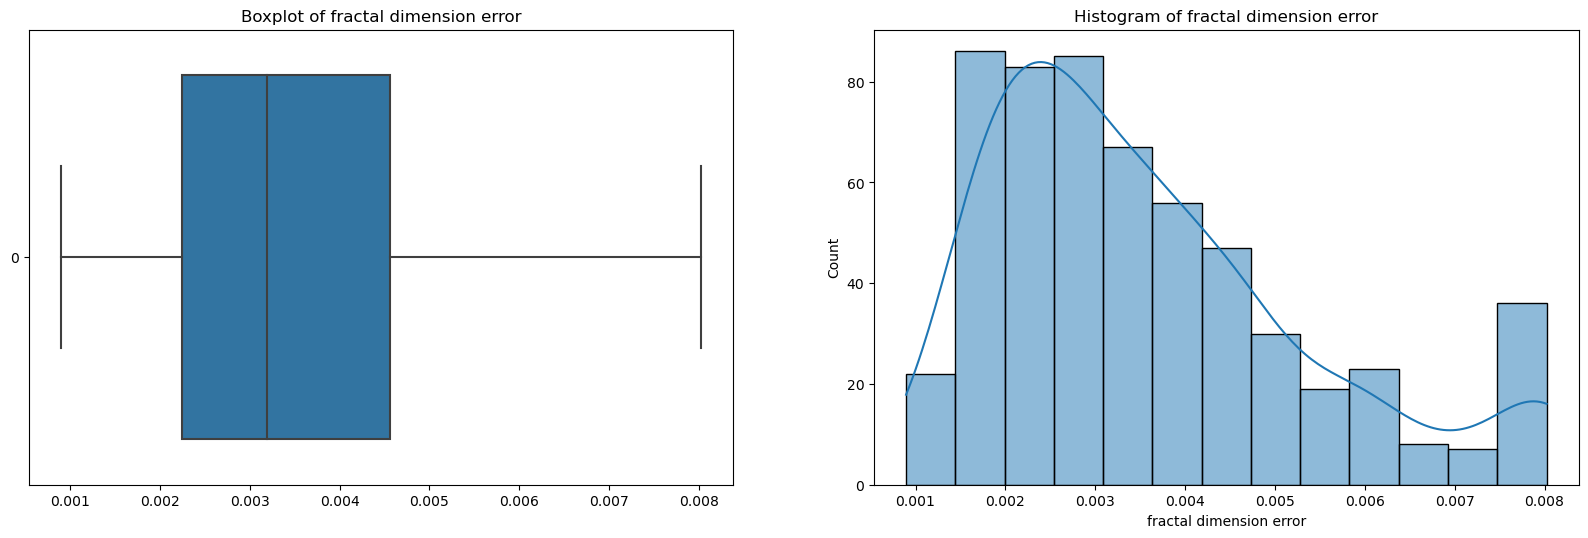

In [21]:
plot_visualizer(df_iqr, 'fractal dimension error')

In [22]:
df_iqr = iqr(df_iqr,"perimeter error",1.5)

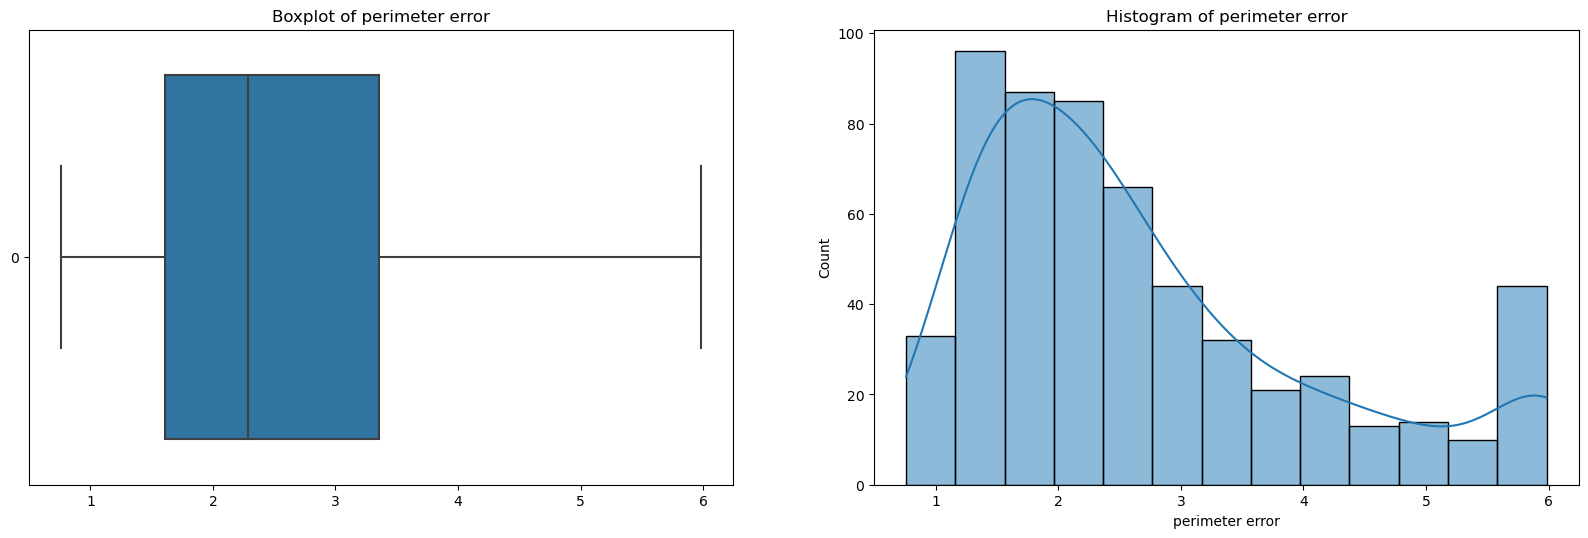

In [23]:
plot_visualizer(df_iqr, 'perimeter error')

In [24]:
df_iqr = iqr(df_iqr,"radius error",1.5)

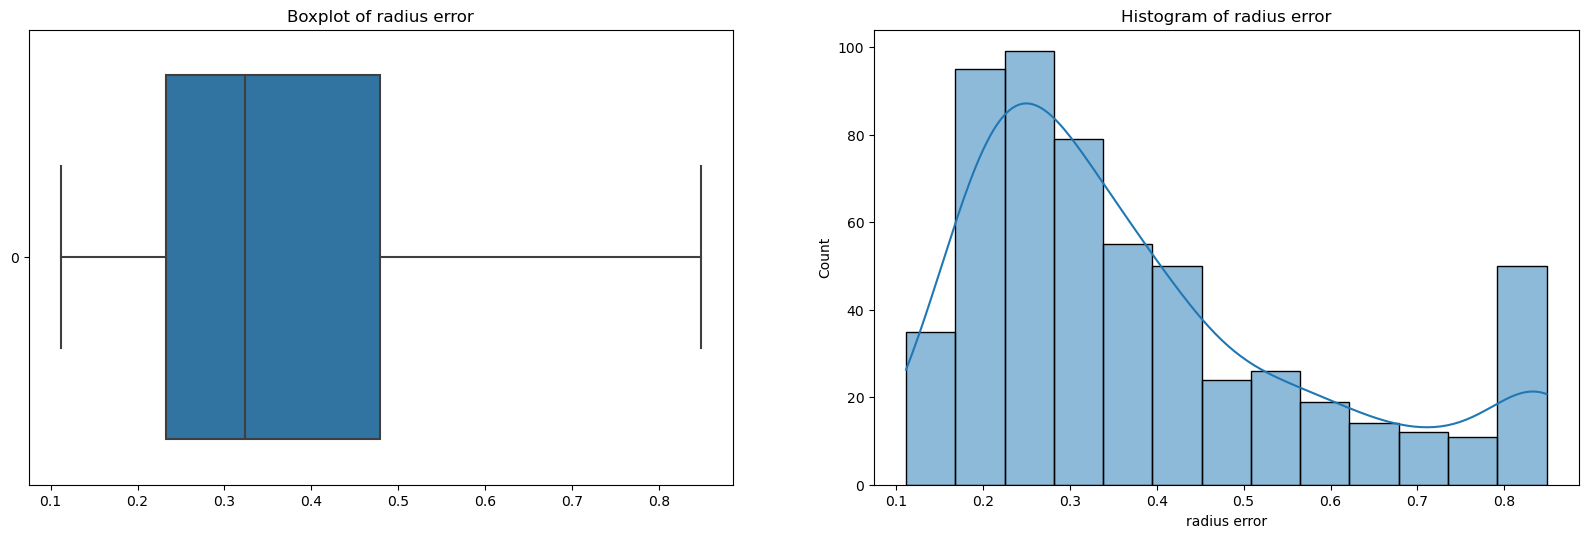

In [25]:
plot_visualizer(df_iqr, 'radius error')

In [26]:
df_iqr = iqr(df_iqr,"smoothness error",1.5)

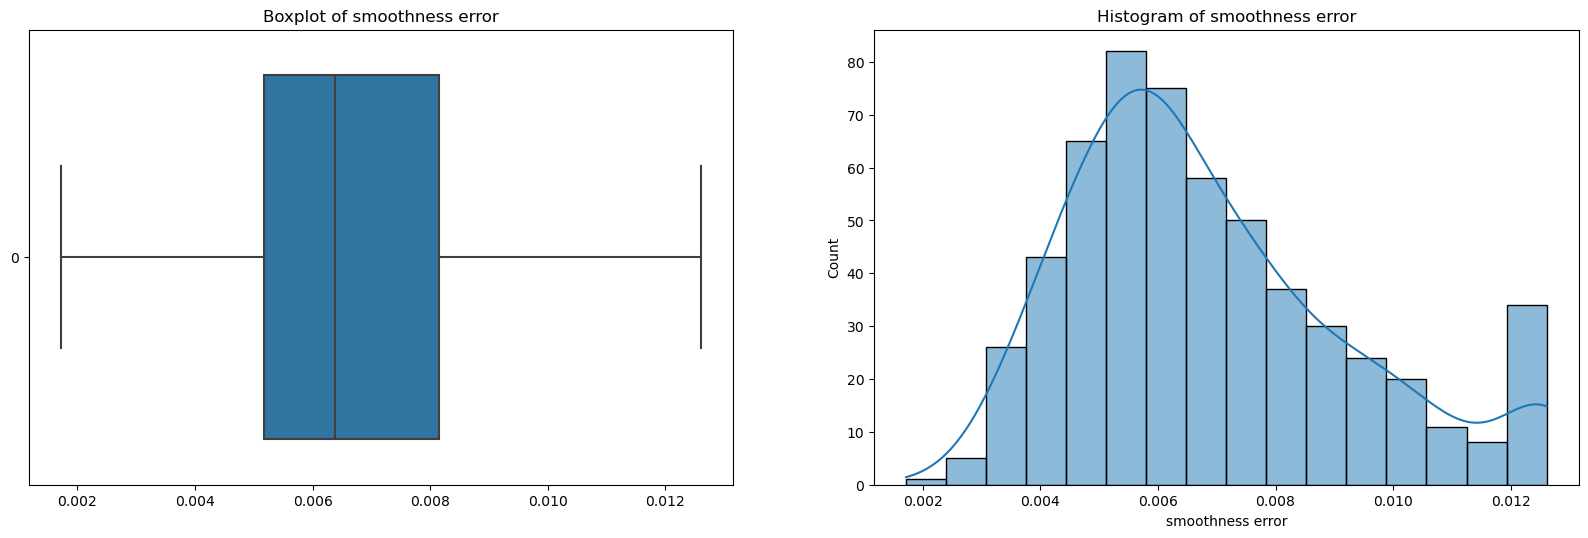

In [27]:
plot_visualizer(df_iqr, 'smoothness error')

In [28]:
df_iqr = iqr(df_iqr,"symmetry error",1.5)

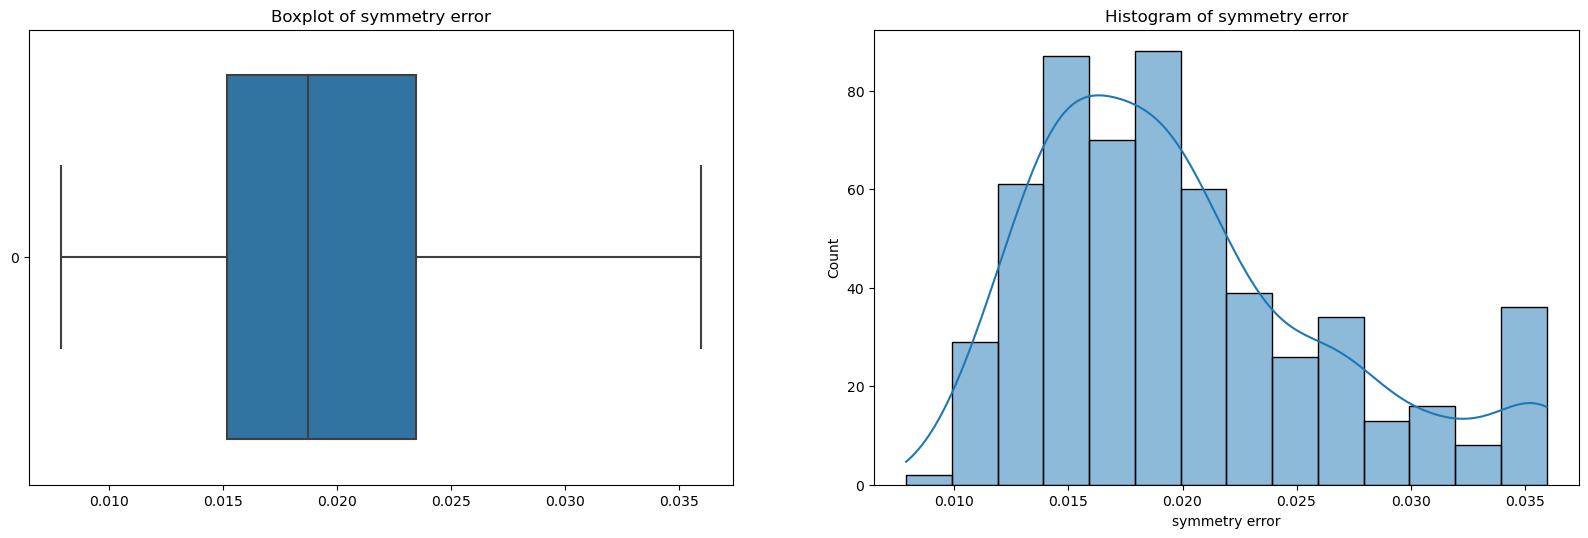

In [29]:
plot_visualizer(df_iqr, 'symmetry error')

In [30]:
df_iqr = iqr(df_iqr,"compactness error",1.5)

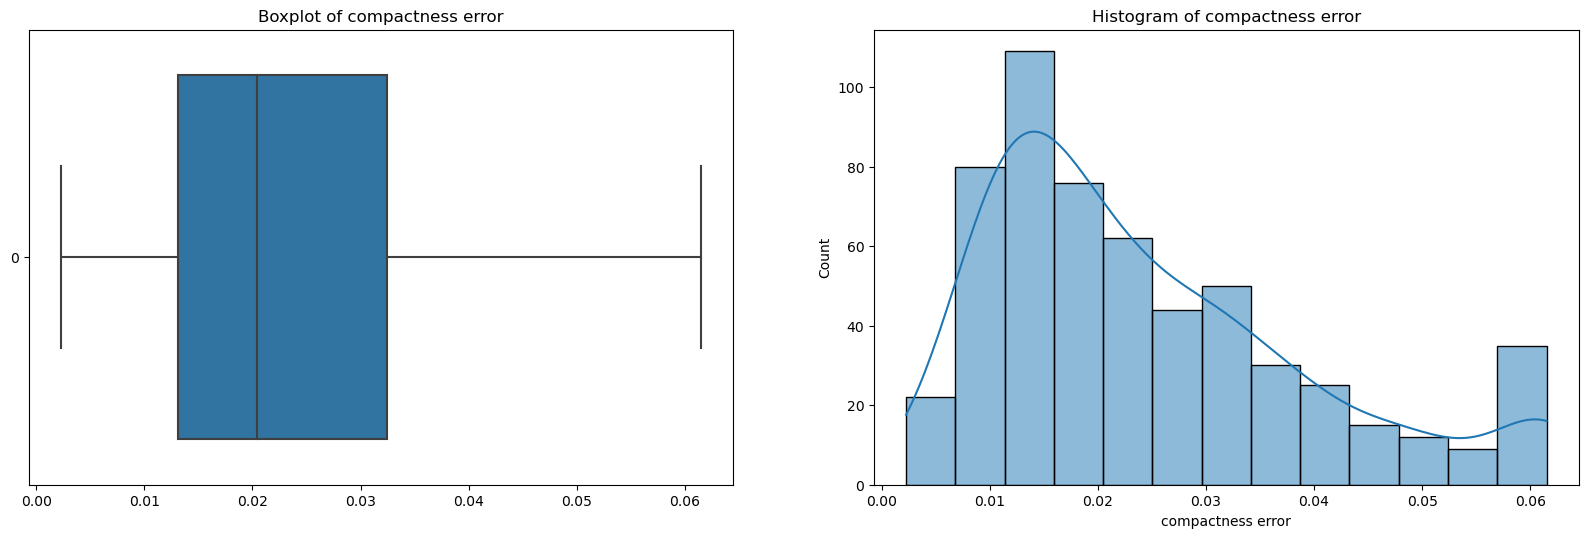

In [31]:
plot_visualizer(df_iqr, 'compactness error')

In [32]:
df_iqr = iqr(df_iqr,"worst area",1.5)

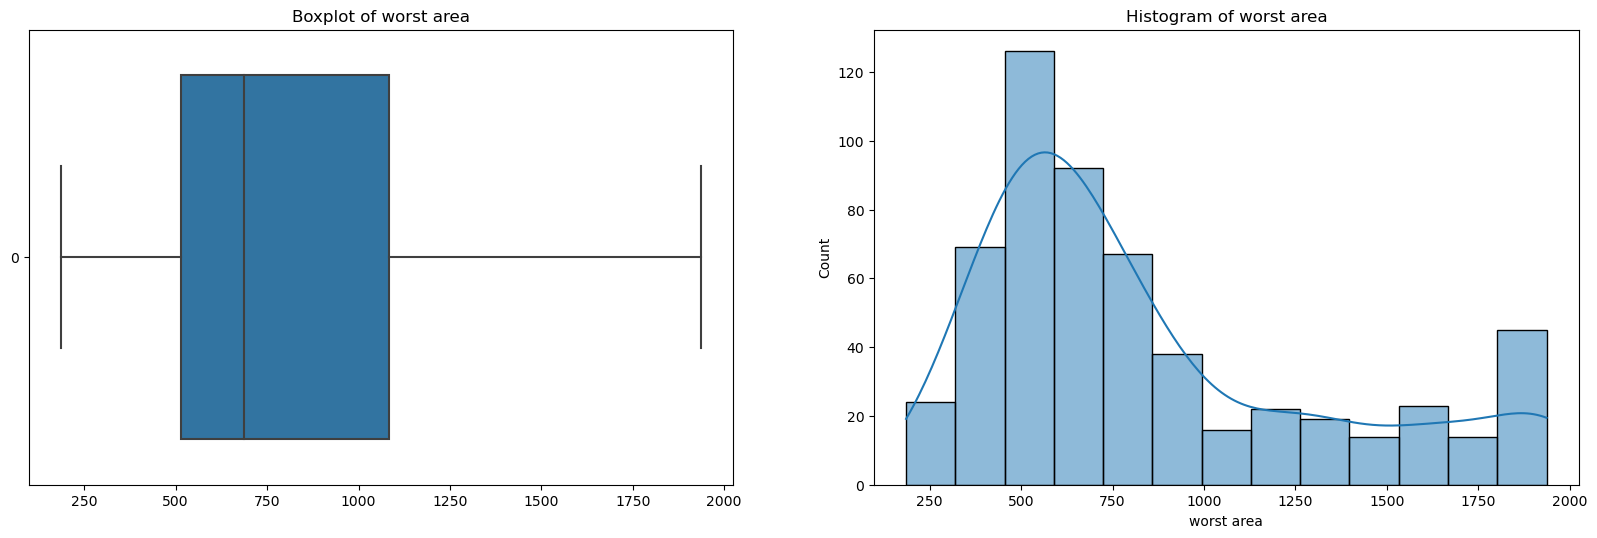

In [33]:
plot_visualizer(df_iqr, 'worst area')

In [34]:
df_iqr = iqr(df_iqr,"worst fractal dimension",1.5)

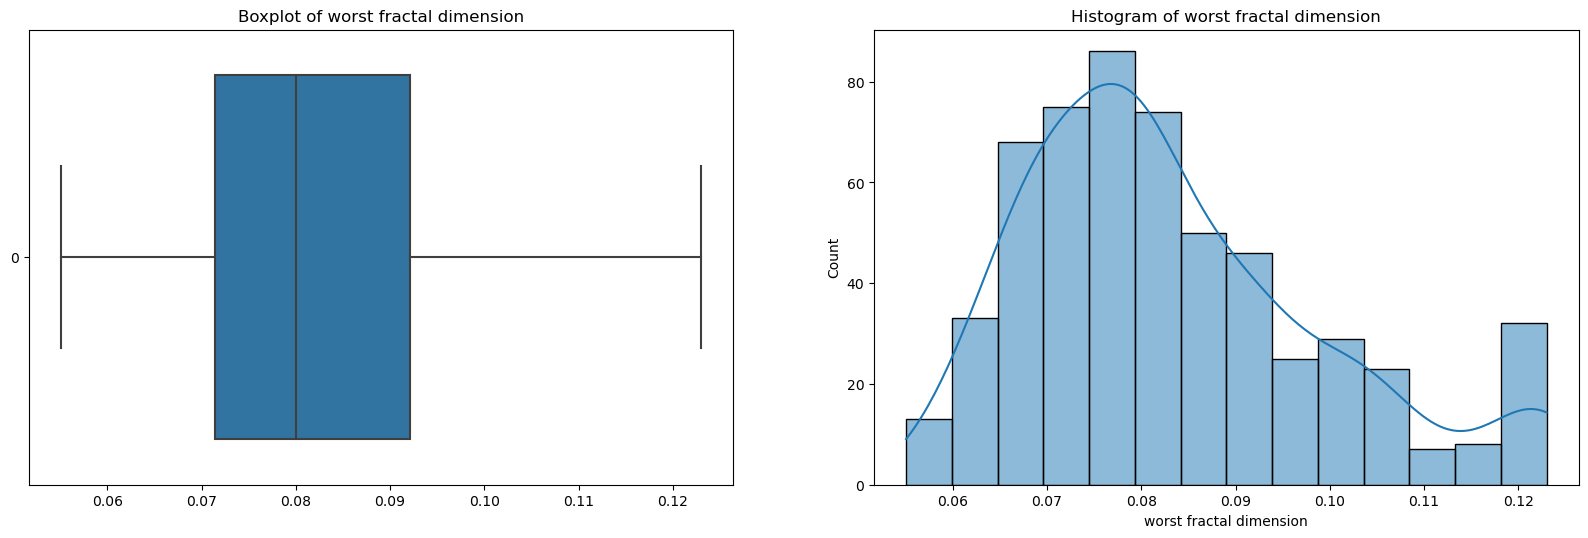

In [35]:
plot_visualizer(df_iqr, 'worst fractal dimension')

In [36]:
df_iqr = iqr(df_iqr,"texture error",1.5)

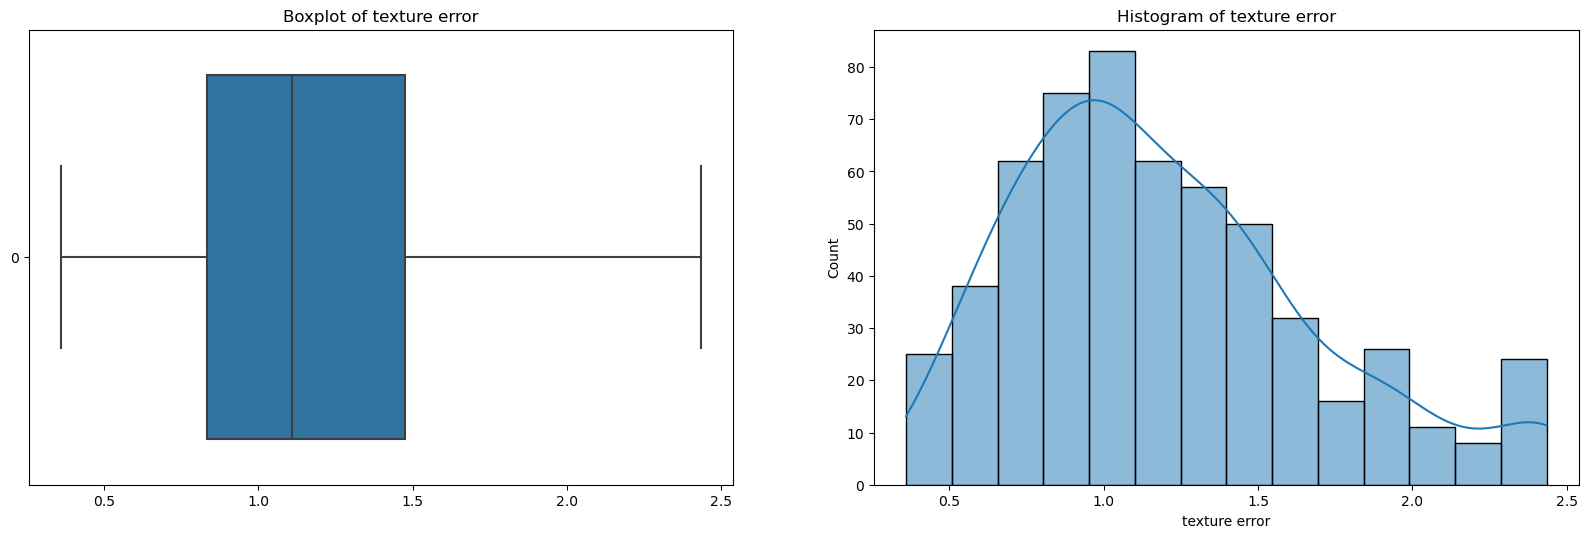

In [37]:
plot_visualizer(df_iqr, 'texture error')

In [38]:
df_iqr = iqr(df_iqr,'mean area',1.5)

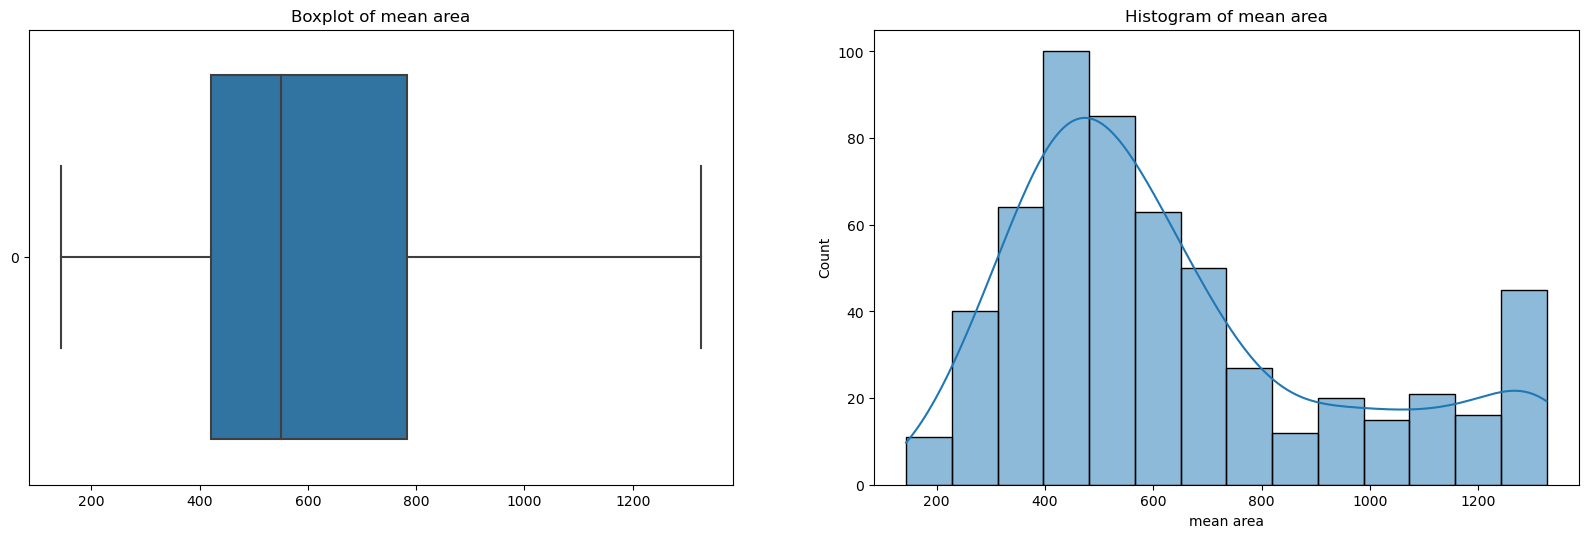

In [39]:
plot_visualizer(df_iqr, 'mean area')

In [40]:
df_iqr = iqr(df_iqr,'worst compactness',1.5)

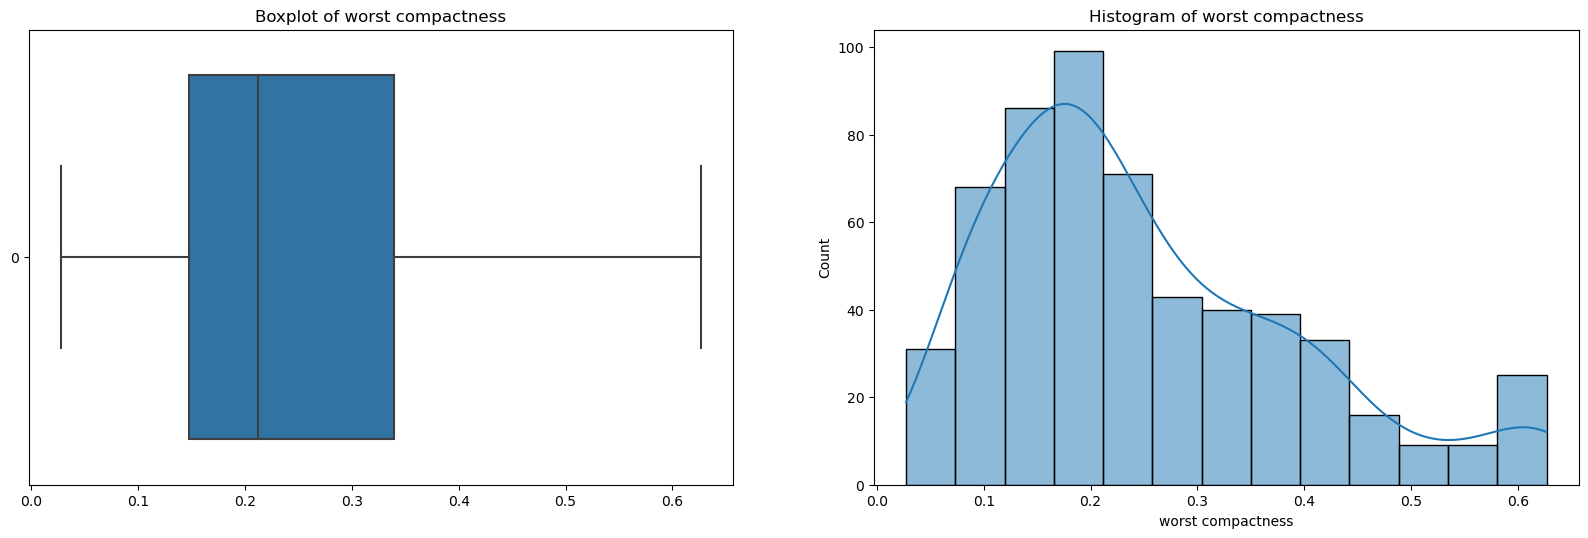

In [41]:
plot_visualizer(df_iqr, 'worst compactness')

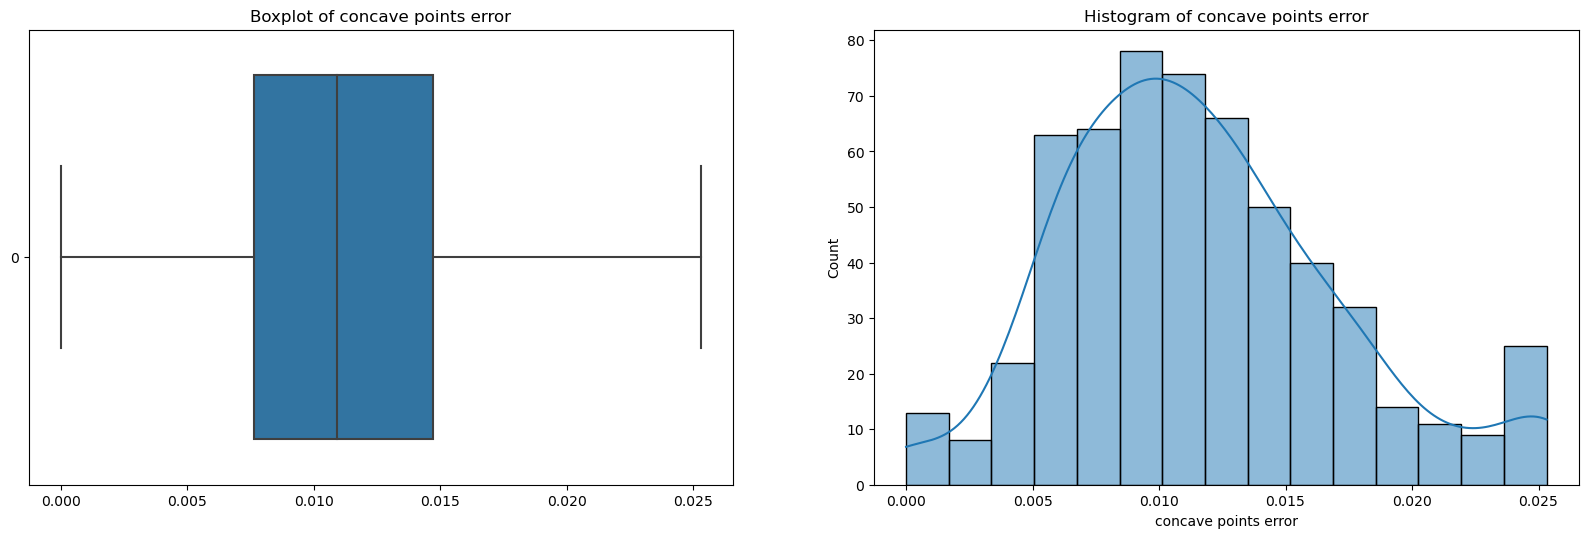

In [42]:
df_iqr = iqr(df_iqr,'concave points error',1.5)
plot_visualizer(df_iqr, 'concave points error')

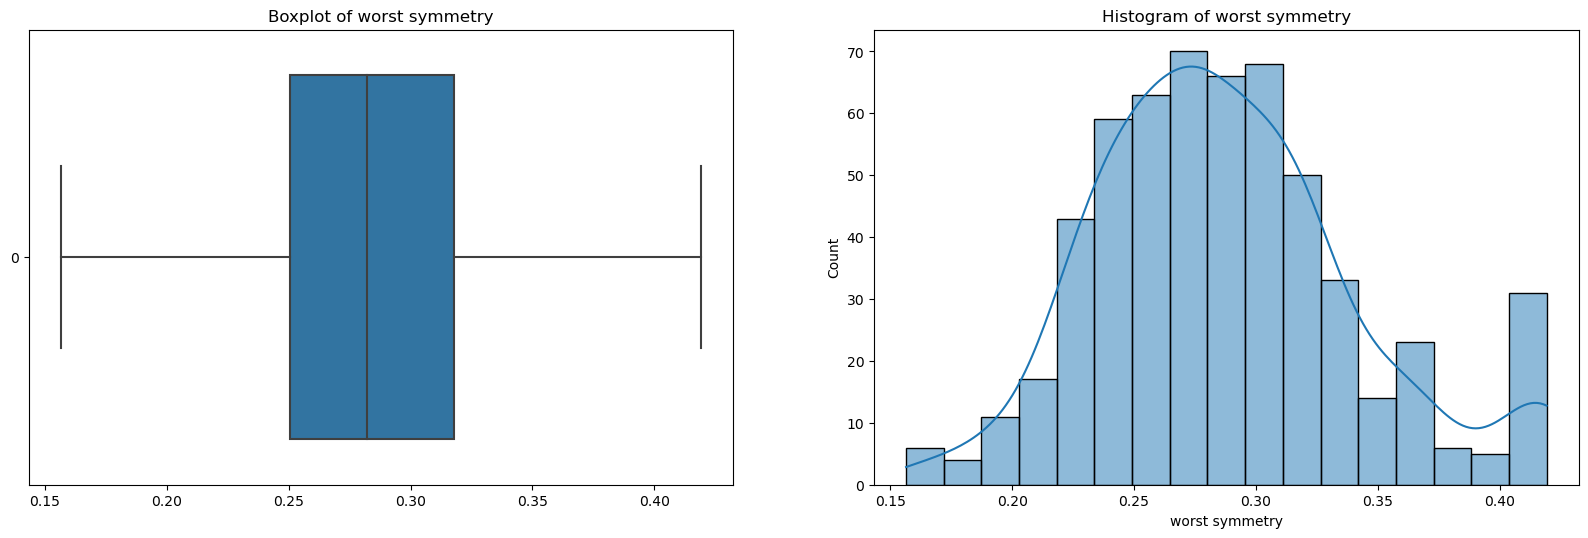

In [43]:
df_iqr = iqr(df_iqr,'worst symmetry',1.5)
plot_visualizer(df_iqr, 'worst symmetry')

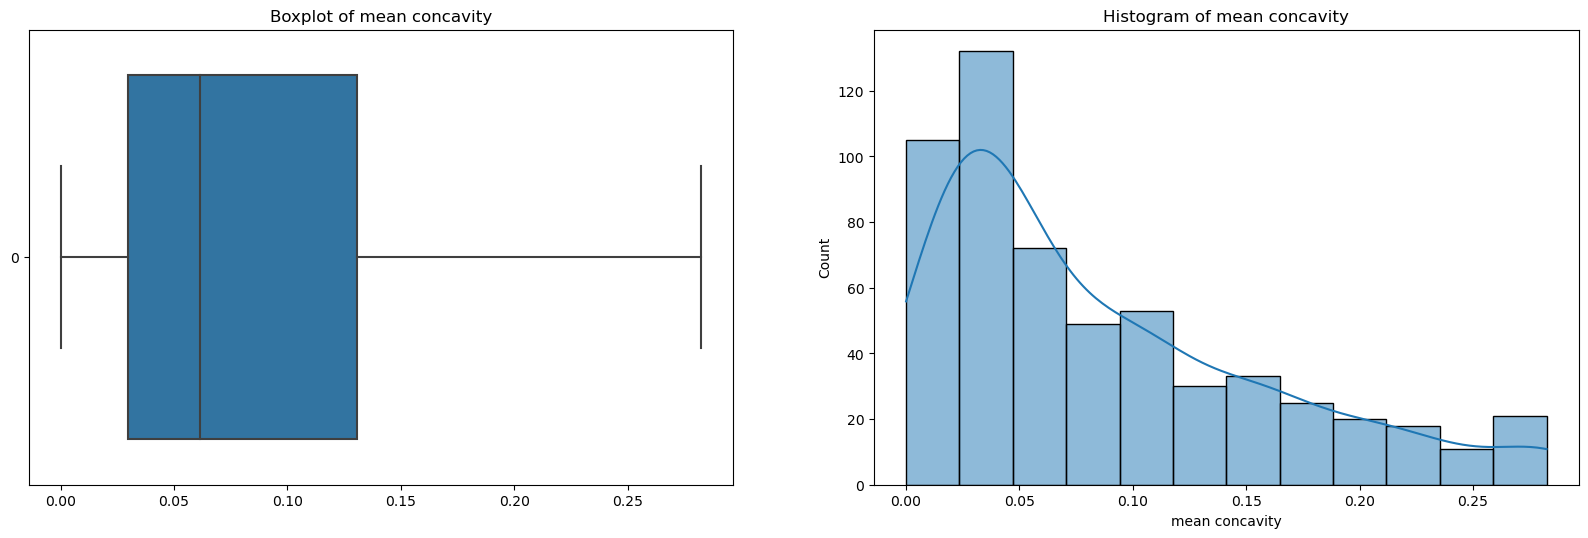

In [44]:
df_iqr = iqr(df_iqr,'mean concavity',1.5)
plot_visualizer(df_iqr, 'mean concavity')

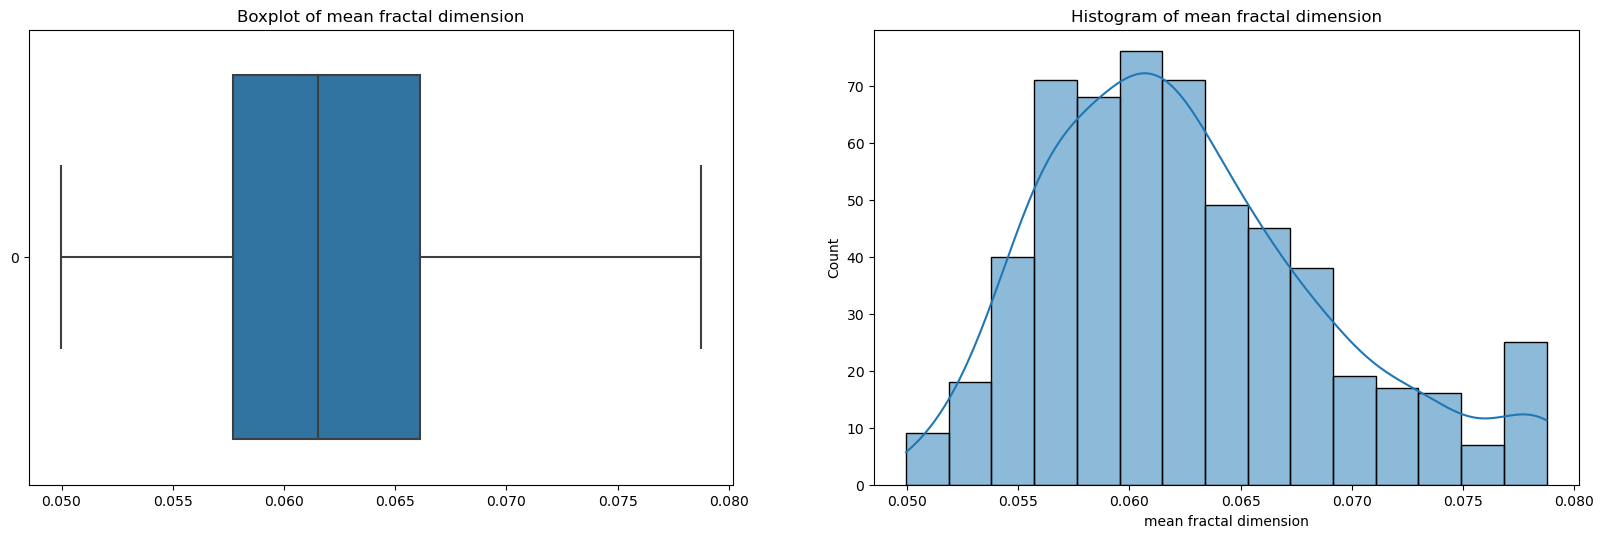

In [45]:
df_iqr = iqr(df_iqr,'mean fractal dimension',1.5)
plot_visualizer(df_iqr, 'mean fractal dimension')

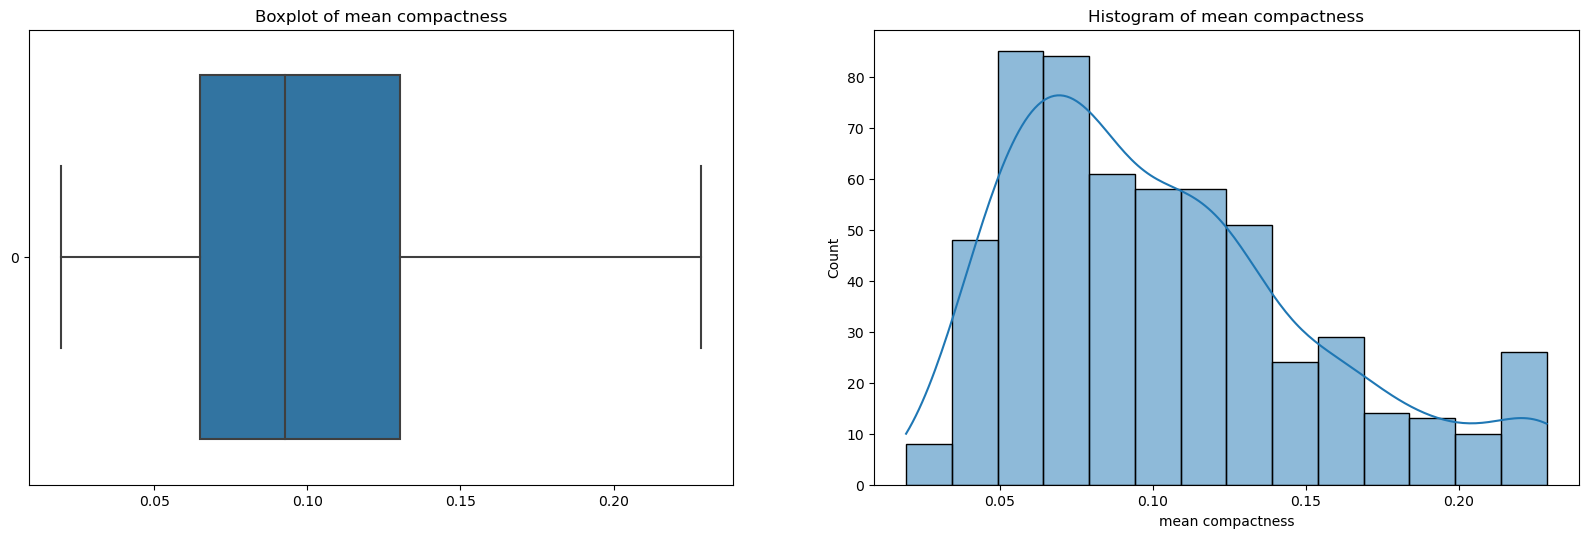

In [46]:
df_iqr = iqr(df_iqr,'mean compactness',1.5)
plot_visualizer(df_iqr, 'mean compactness')

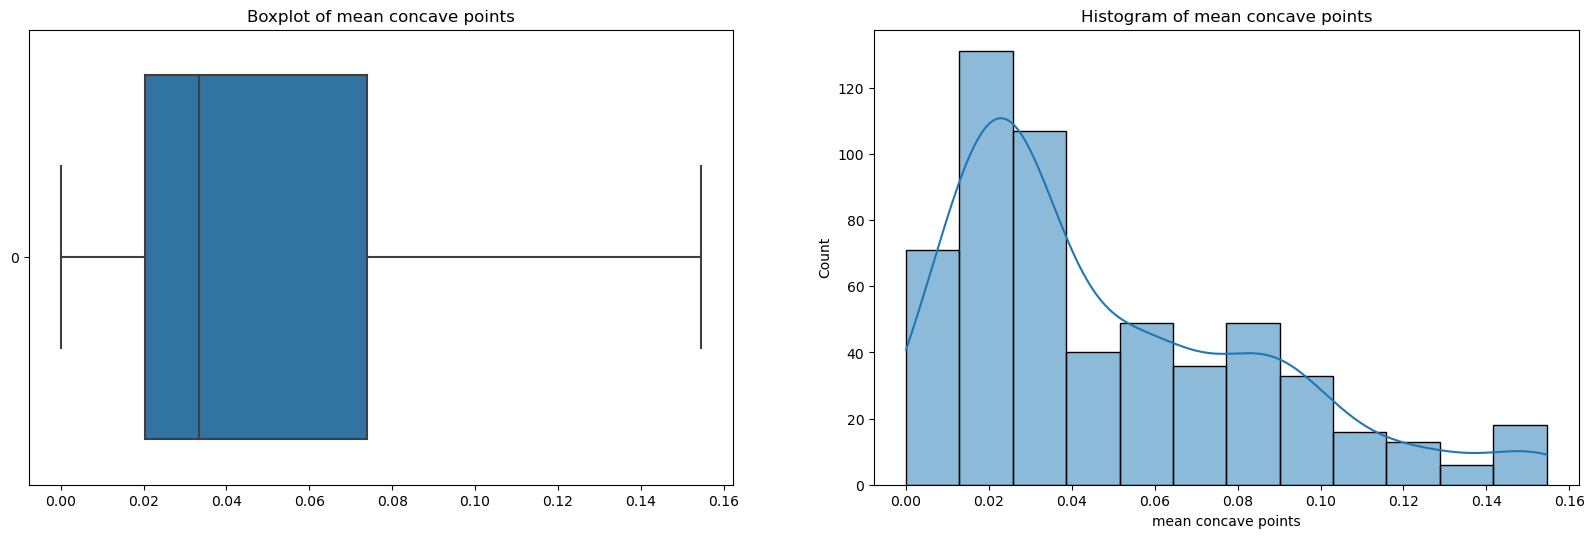

In [47]:
df_iqr = iqr(df_iqr,'mean concave points',1.5)
plot_visualizer(df_iqr, 'mean concave points')

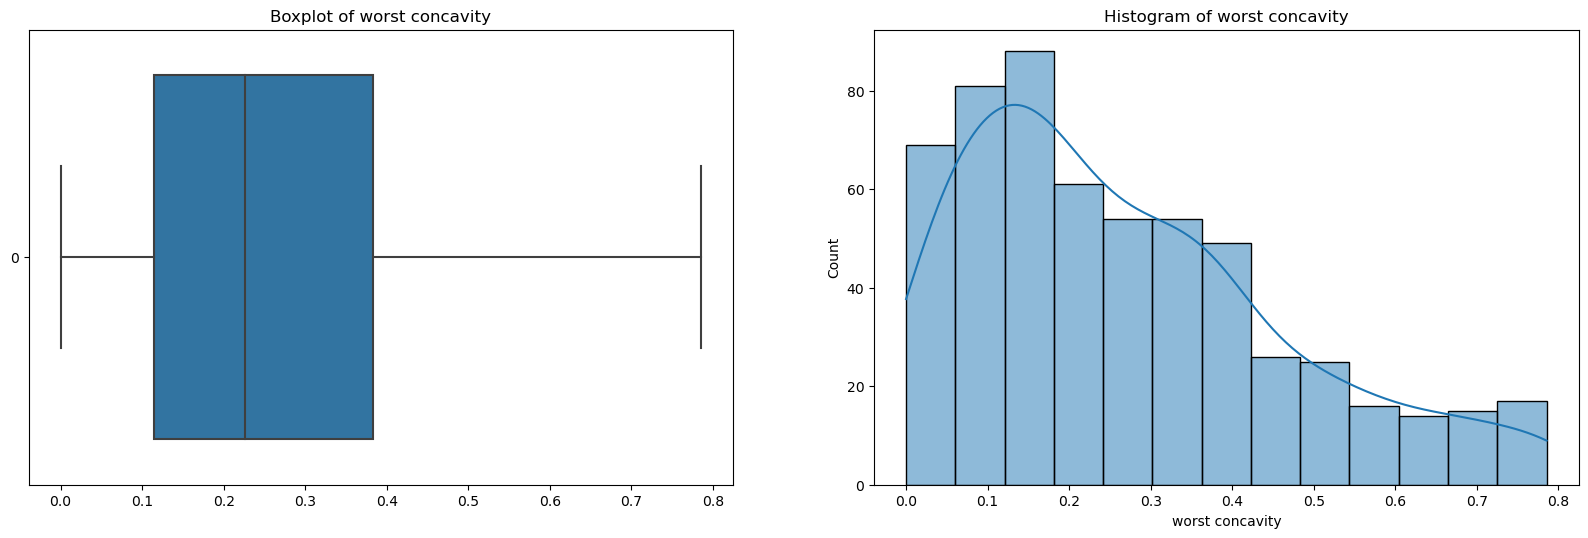

In [48]:
df_iqr = iqr(df_iqr,'worst concavity',1.5)
plot_visualizer(df_iqr, 'worst concavity')

In [49]:
df_iqr.skew().sort_values(ascending=False)

area error                 1.130940
worst perimeter            1.128164
worst radius               1.103115
worst area                 1.048970
perimeter error            1.034389
radius error               1.025031
mean concavity             1.023859
mean concave points        1.004049
mean perimeter             0.990650
compactness error          0.990285
fractal dimension error    0.979344
mean radius                0.942380
mean area                  0.922884
concavity error            0.916740
worst compactness          0.915295
symmetry error             0.869297
worst fractal dimension    0.831581
mean compactness           0.826755
worst concavity            0.809174
smoothness error           0.780923
texture error              0.740987
mean symmetry              0.725609
mean fractal dimension     0.682430
mean texture               0.650450
concave points error       0.539571
worst symmetry             0.521772
worst texture              0.498321
worst concave points       0

In [50]:
df_iqr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.22862,0.28241,0.14710,0.2419,0.07871,...,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.22862,0.24140,0.10520,0.2597,0.07875,...,26.50,98.87,567.70,0.20980,0.62695,0.6869,0.2575,0.41915,0.12301,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.22862,0.28241,0.15200,0.2397,0.07016,...,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301,0


## Normalization

Normalization is a data preprocessing technique used to transform features in a dataset to a common scale, improving the performance and accuracy of machine learning algorithms. The main goal of normalization is to eliminate the potential biases and distortions caused by the different scales of features.

In [51]:
minmax = MinMaxScaler(feature_range=(0, 1))

In [52]:
df_iqr['area error'].skew()

1.1309400633896982

In [53]:
for i in df_iqr:  # normalise all the columns with skewness > 1 with MinMaxScaler function
    if df_iqr[i].skew() > 1:
        df_iqr[i] = minmax.fit_transform(df_iqr[[i]])
    

In [54]:
df_iqr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.22862,1.000000,0.951888,0.2419,0.07871,...,17.33,0.668310,1.000000,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.307709,0.454072,0.1812,0.05667,...,23.41,0.539818,1.000000,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.698984,0.827644,0.2069,0.05999,...,25.53,0.508442,0.869823,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.22862,0.854786,0.680752,0.2597,0.07875,...,26.50,0.241347,0.218341,0.20980,0.62695,0.6869,0.2575,0.41915,0.12301,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.701108,0.674928,0.1809,0.05883,...,16.67,0.506948,0.793333,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.11100,0.11590,0.863638,0.898826,0.1726,0.05623,...,26.40,0.576174,1.000000,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.509897,0.633578,0.1752,0.05533,...,38.25,0.520892,0.882381,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.327573,0.343094,0.1590,0.05648,...,34.12,0.379949,0.535891,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.22862,1.000000,0.983596,0.2397,0.07016,...,39.42,0.668310,0.933756,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301,0


In [55]:
df_iqr.to_csv('EDA.csv', index=False) #Transport preprocessed dataset

## Features and Target selection

In [56]:
# features
x = df_iqr.drop(columns='target')

#target
y = df_iqr['target']


## Standardization

In [57]:
st = StandardScaler()

In [58]:
x_scaled = st.fit_transform(x)

## Train_Test_Split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [60]:
x_train.shape

(455, 30)

In [61]:
x_test.shape

(114, 30)